C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dua

                     Classifier  Training Time (s)  Accuracy  Precision  \
0                 Decision Tree           1.381361  0.707865   0.727708   
1           Logistic Regression           0.165327  0.634708   0.636297   
2                  SVM (Linear)          82.230039  0.629937   0.631560   
3              SVM (Polynomial)          50.743221  0.509599   0.590236   
4                 Random Forest           1.020174  0.822258   0.830697   
5                   Naive Bayes           0.088478  0.563520   0.569438   
6  Linear Discriminant Analysis           0.990987  0.635427   0.637409   
7                           KNN           0.171756  0.650422   0.669501   

     Recall  F1-score   ROC AUC  Model Size (MB)  
0  0.707865  0.702168  0.791001         0.066140  
1  0.634708  0.634108  0.682154         0.001571  
2  0.629937  0.629292  0.680572         0.006626  
3  0.509599  0.381574  0.566133         0.783626  
4  0.822258  0.821322  0.916265         0.701867  
5  0.563520  0.556

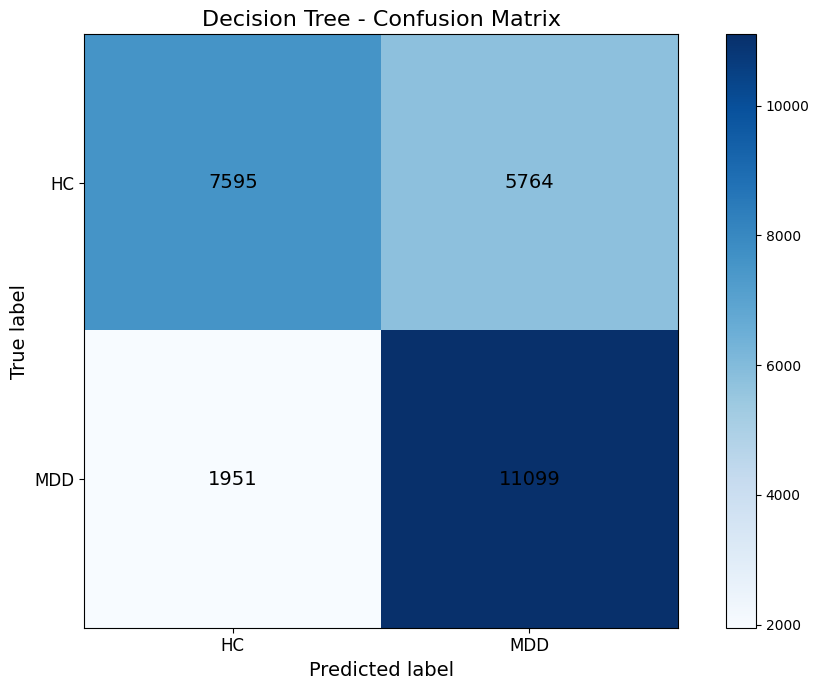

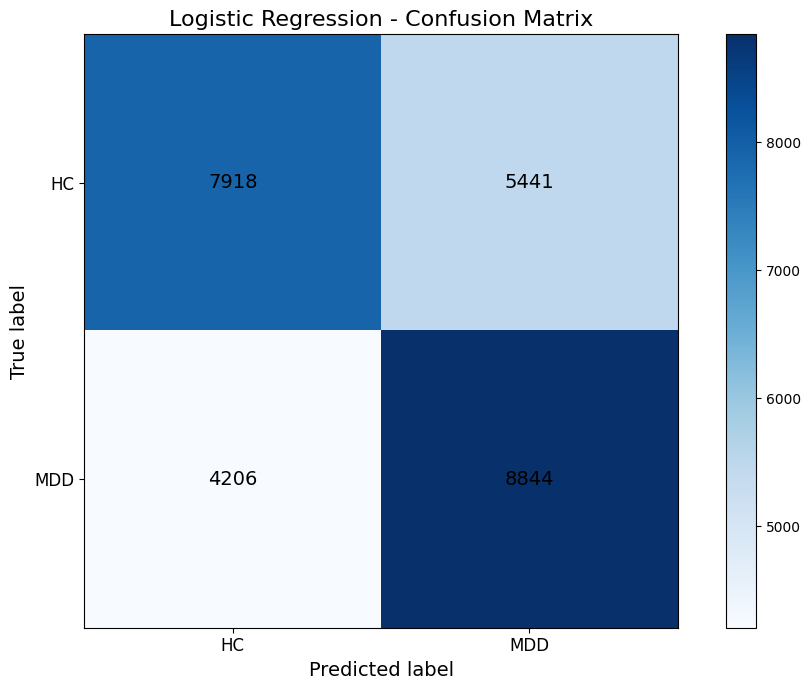

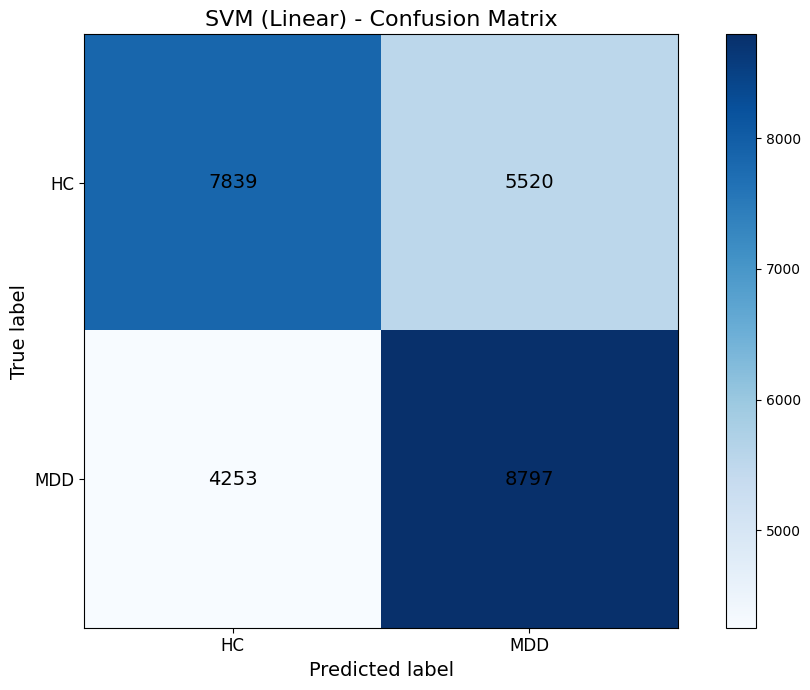

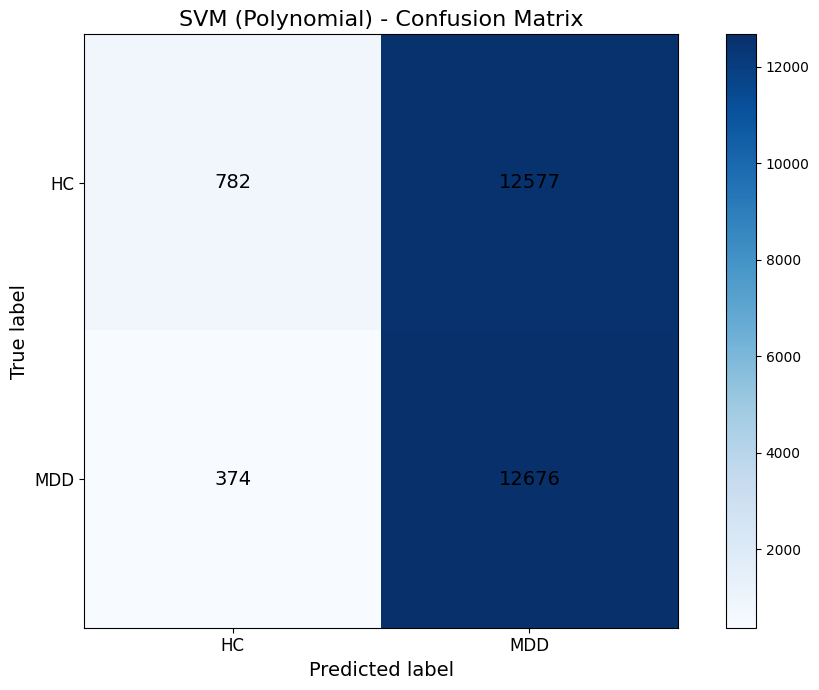

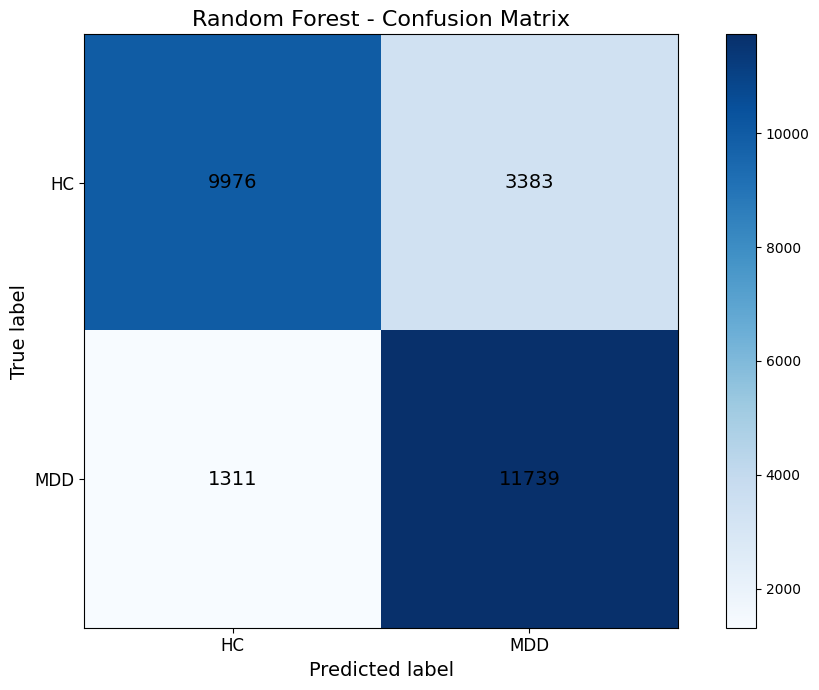

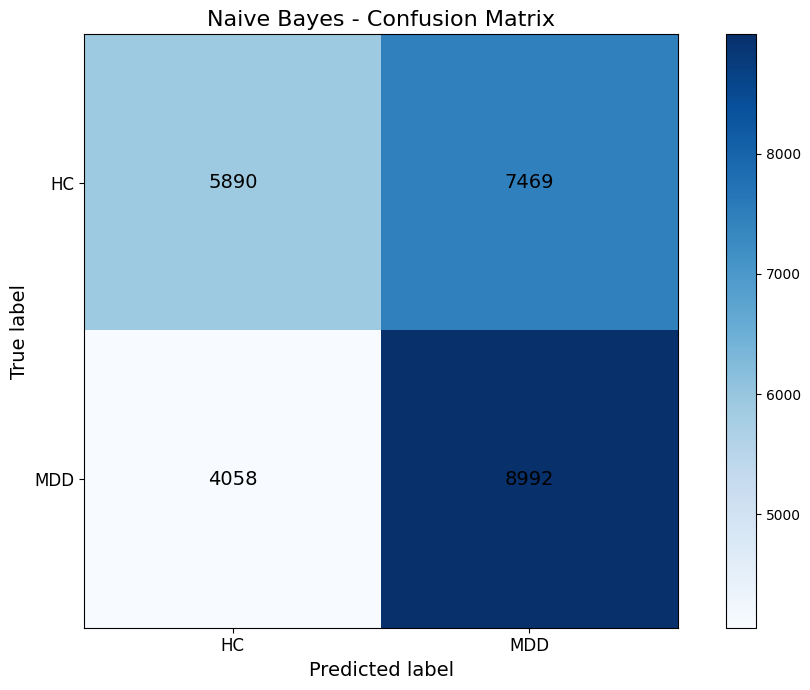

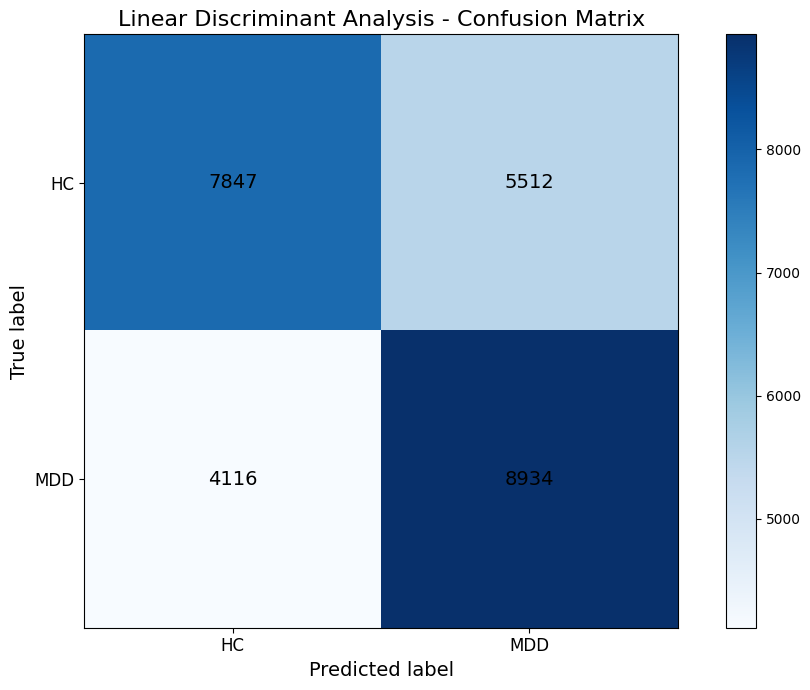

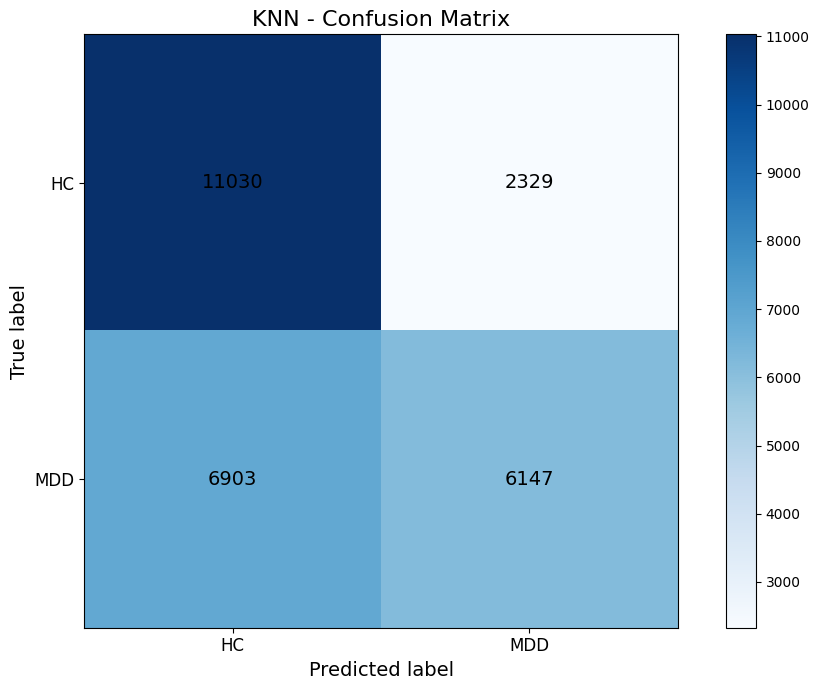

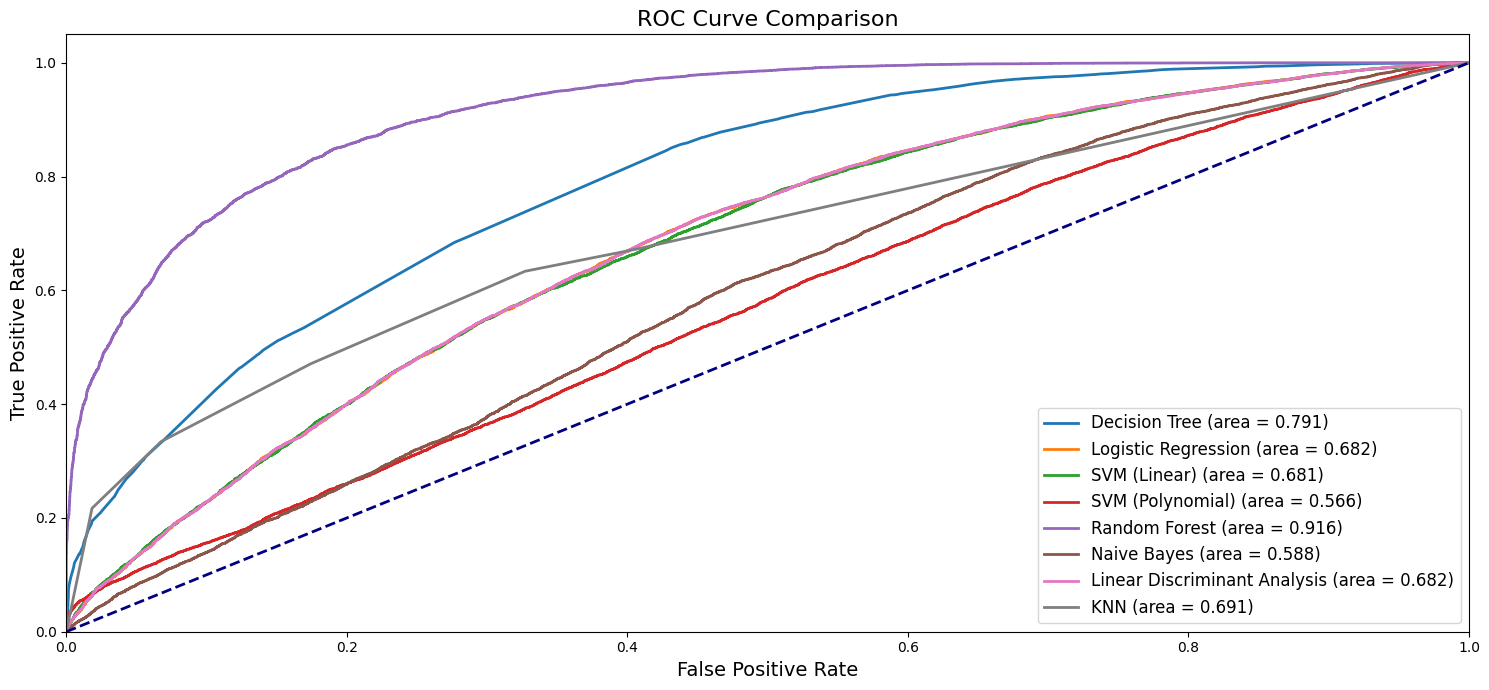


Decision Tree - Classification Report:

              precision  recall  f1-score   support
0                 0.796   0.569     0.663 13359.000
1                 0.658   0.850     0.742 13050.000
accuracy          0.708   0.708     0.708     0.708
macro avg         0.727   0.710     0.703 26409.000
weighted avg      0.728   0.708     0.702 26409.000

Logistic Regression - Classification Report:

              precision  recall  f1-score   support
0                 0.653   0.593     0.621 13359.000
1                 0.619   0.678     0.647 13050.000
accuracy          0.635   0.635     0.635     0.635
macro avg         0.636   0.635     0.634 26409.000
weighted avg      0.636   0.635     0.634 26409.000

SVM (Linear) - Classification Report:

              precision  recall  f1-score   support
0                 0.648   0.587     0.616 13359.000
1                 0.614   0.674     0.643 13050.000
accuracy          0.630   0.630     0.630     0.630
macro avg         0.631   0.630     0.62

In [12]:
# Convention machine learning models
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


# Create the directory 
plot_dir = 'Plots_P2_ConvMLs/'
os.makedirs(plot_dir, exist_ok=True)

# Load the dataset
file_path = 'concatenated_HC_MDD_1000_BoAW_MFCC_with_labels.csv'
data = pd.read_csv(file_path)

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define classifiers 
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Logistic Regression': LogisticRegression(max_iter=100),
    'SVM (Linear)': CalibratedClassifierCV(LinearSVC(max_iter=500)),
    'SVM (Polynomial)': SVC(kernel='poly', degree=3, probability=True, max_iter=500),
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=10),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'KNN': Pipeline([('feature_selection', SelectKBest(f_classif, k=5)),  ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
}

results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = clf.predict(X_test)
    
    if hasattr(clf, "decision_function"):
        y_decision = clf.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_decision)
        roc_auc = roc_auc_score(y_test, y_decision)
    else:
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Save the model to a temporary file to measure its size
    temp_model_file = f"{name}_model.joblib"
    joblib.dump(clf, temp_model_file)
    model_size = os.path.getsize(temp_model_file) / (1024 ** 2)  # Convert size to megabytes
    os.remove(temp_model_file)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True, digits=3)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Classifier': name,
        'Training Time (s)': training_time,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score'],
        'ROC AUC': roc_auc,
        'Model Size (MB)': model_size,
        'Confusion Matrix': cm,
        'ROC Curve': (fpr, tpr, roc_auc),
        'Classification Report': report
    })


results_df = pd.DataFrame(results, columns=['Classifier', 'Training Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Model Size (MB)'])
print(results_df)
# Plotting confusion matrices 
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    plt.yticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    
    # Display the numbers in the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black', fontsize=14)
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


for result in results:
    name = result['Classifier']
    cm = result['Confusion Matrix']
    plot_confusion_matrix(cm, f'{name} - Confusion Matrix', os.path.join(plot_dir, f'{name}_confusion_matrix.png'))

# Function to plot ROC curve
def plot_roc_curve(results, filename):
    plt.figure(figsize=(15, 7))
    for result in results:
        name = result['Classifier']
        fpr, tpr, roc_auc = result['ROC Curve']
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:0.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve Comparison', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plotting ROC curves for all classifiers
plot_roc_curve(results, os.path.join(plot_dir, 'roc_curve_comparison.png'))

# Displaying classification reports
for result in results:
    name = result['Classifier']
    report = result['Classification Report']
    print(f"\n{name} - Classification Report:\n")
    report_df = pd.DataFrame(report).transpose()
    print(report_df.to_string(float_format="%.3f"))


Training Bagging with Random Forest...
Evaluating Bagging with Random Forest...
Training Bagging with Decision Tree...
Evaluating Bagging with Decision Tree...
Training Bagging with Logistic Regression...
Evaluating Bagging with Logistic Regression...
Training Bagging with Linear SVM...


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Evaluating Bagging with Linear SVM...
Training Bagging with LDA...
Evaluating Bagging with LDA...
Training AdaBoost with Random Forest...


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluating AdaBoost with Random Forest...
Training AdaBoost with Decision Tree...


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluating AdaBoost with Decision Tree...
Training AdaBoost with Logistic Regression...


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluating AdaBoost with Logistic Regression...
Training AdaBoost with Linear SVM...


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Evaluating AdaBoost with Linear SVM...
Training Stochastic Gradient Boosting with Decision Tree...
Evaluating Stochastic Gradient Boosting with Decision Tree...
                                        Classifier  Training Time (s)  \
0                       Bagging with Random Forest           1.364726   
1                       Bagging with Decision Tree           1.820319   
2                 Bagging with Logistic Regression           0.332822   
3                          Bagging with Linear SVM          60.885705   
4                                 Bagging with LDA           2.136717   
5                      AdaBoost with Random Forest           2.243852   
6                      AdaBoost with Decision Tree           3.028555   
7                AdaBoost with Logistic Regression           0.244108   
8                         AdaBoost with Linear SVM          89.479924   
9  Stochastic Gradient Boosting with Decision Tree           2.824347   

   Accuracy  Precision    Recall  F

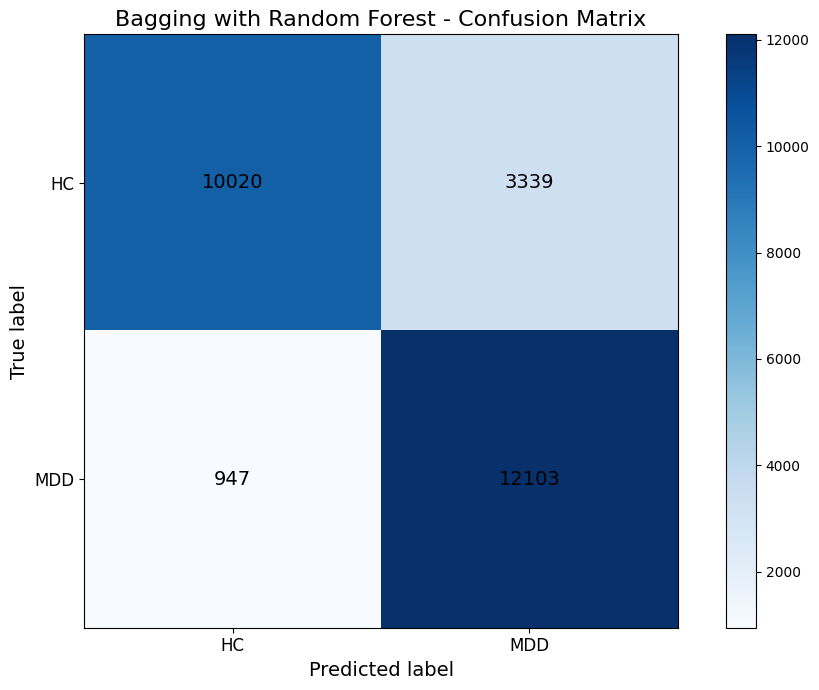

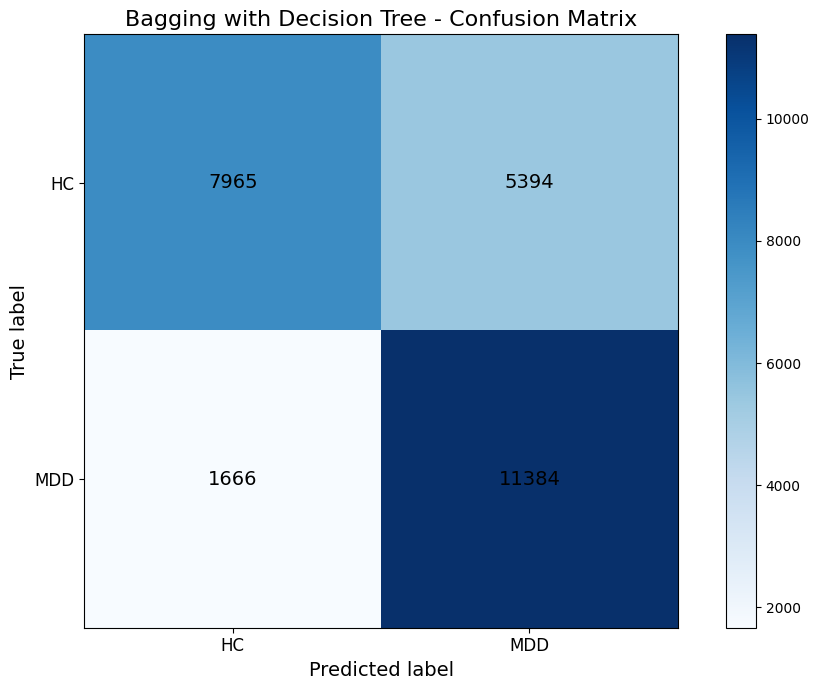

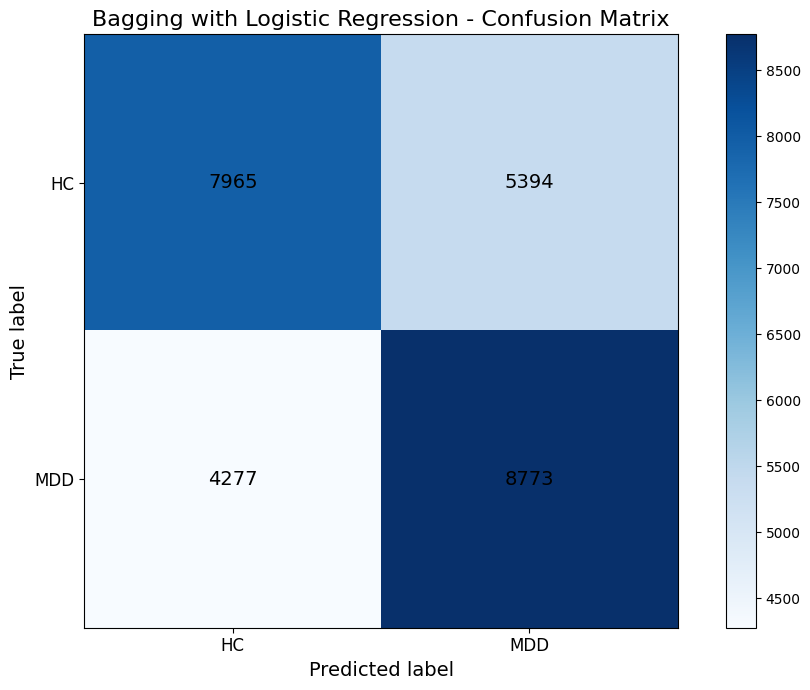

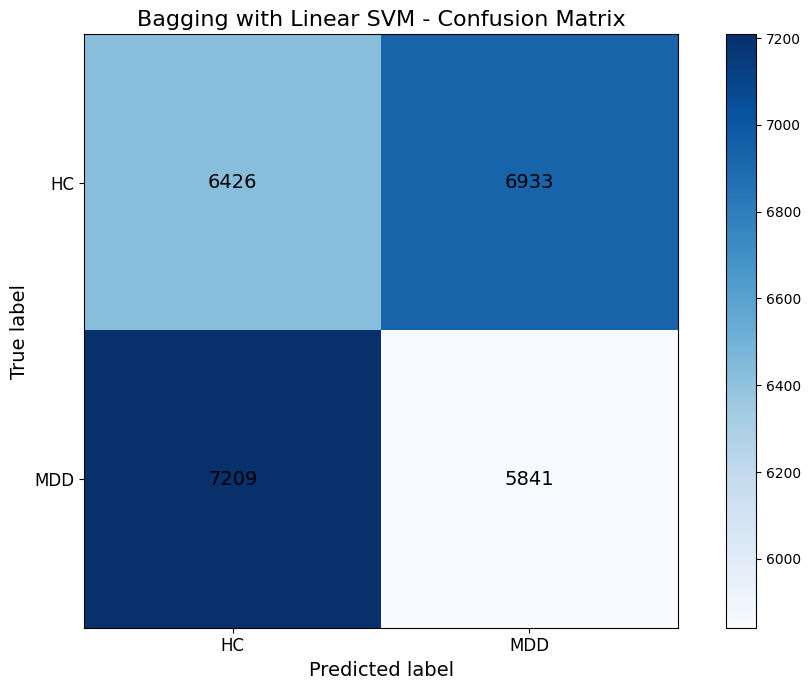

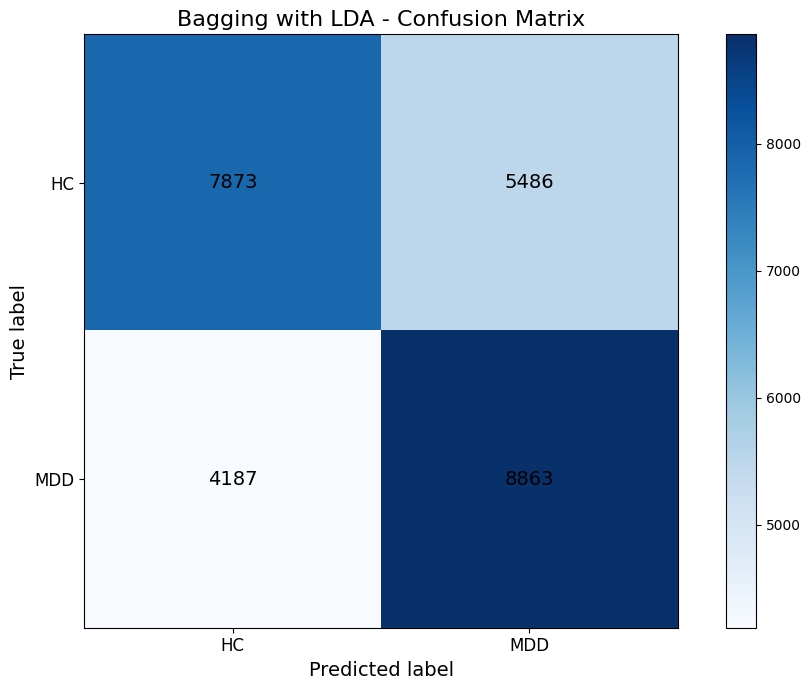

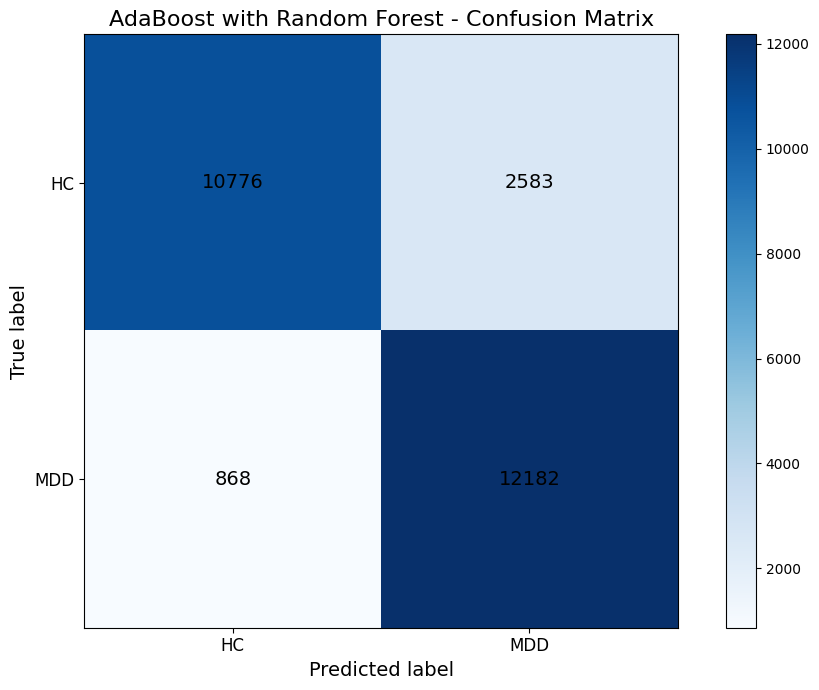

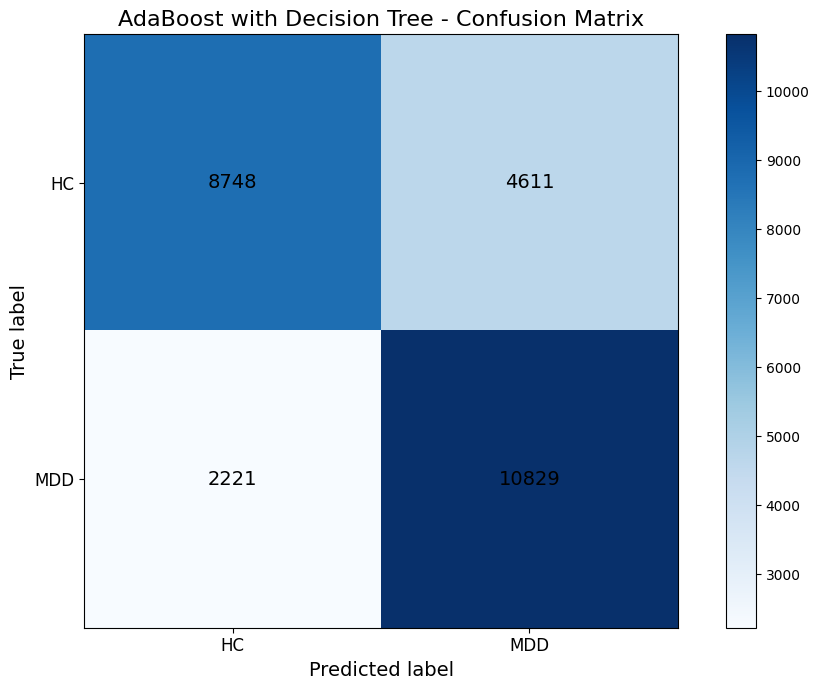

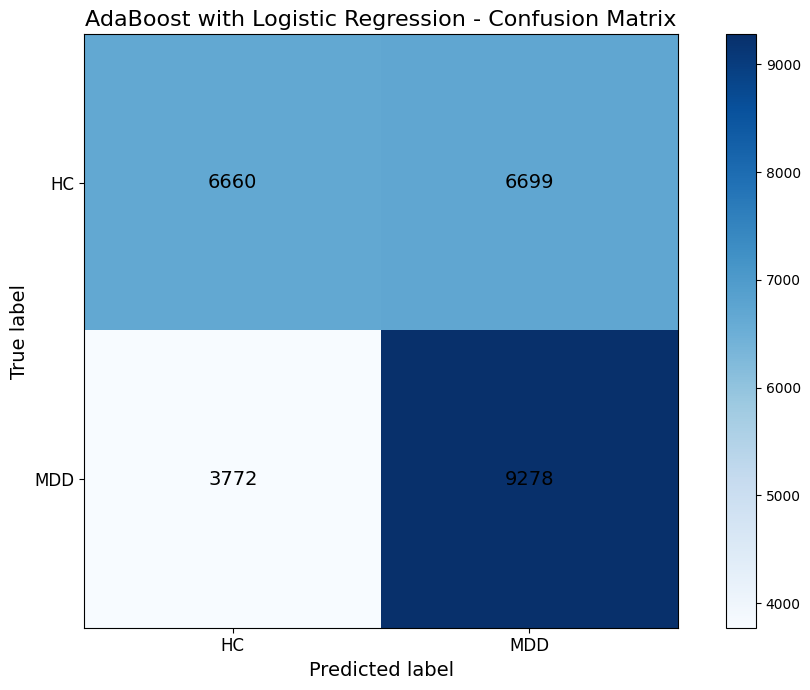

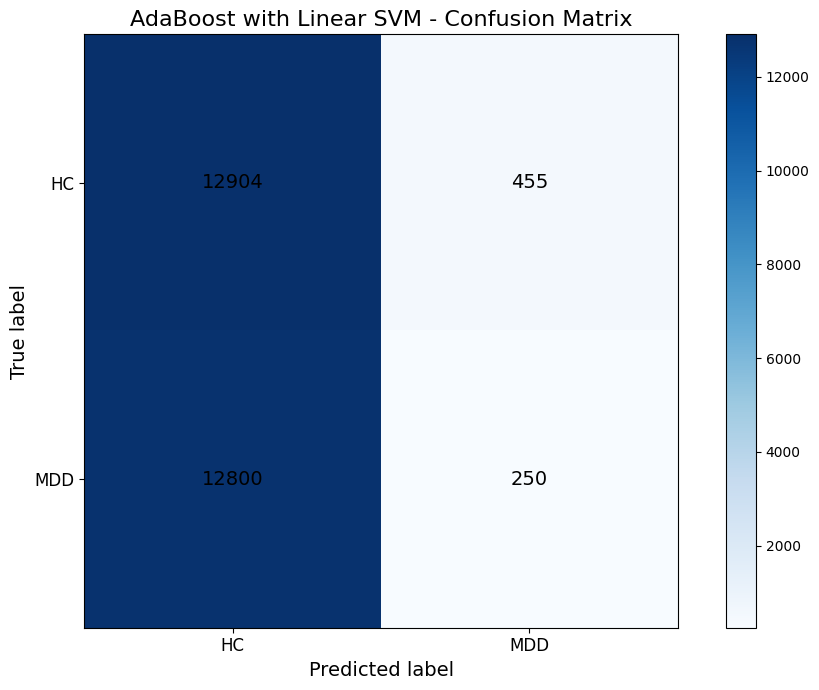

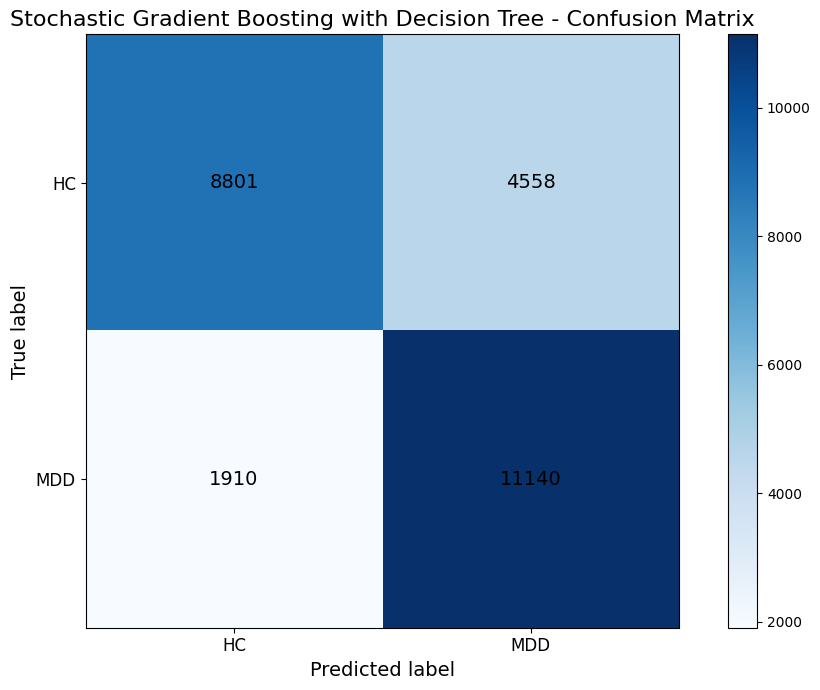

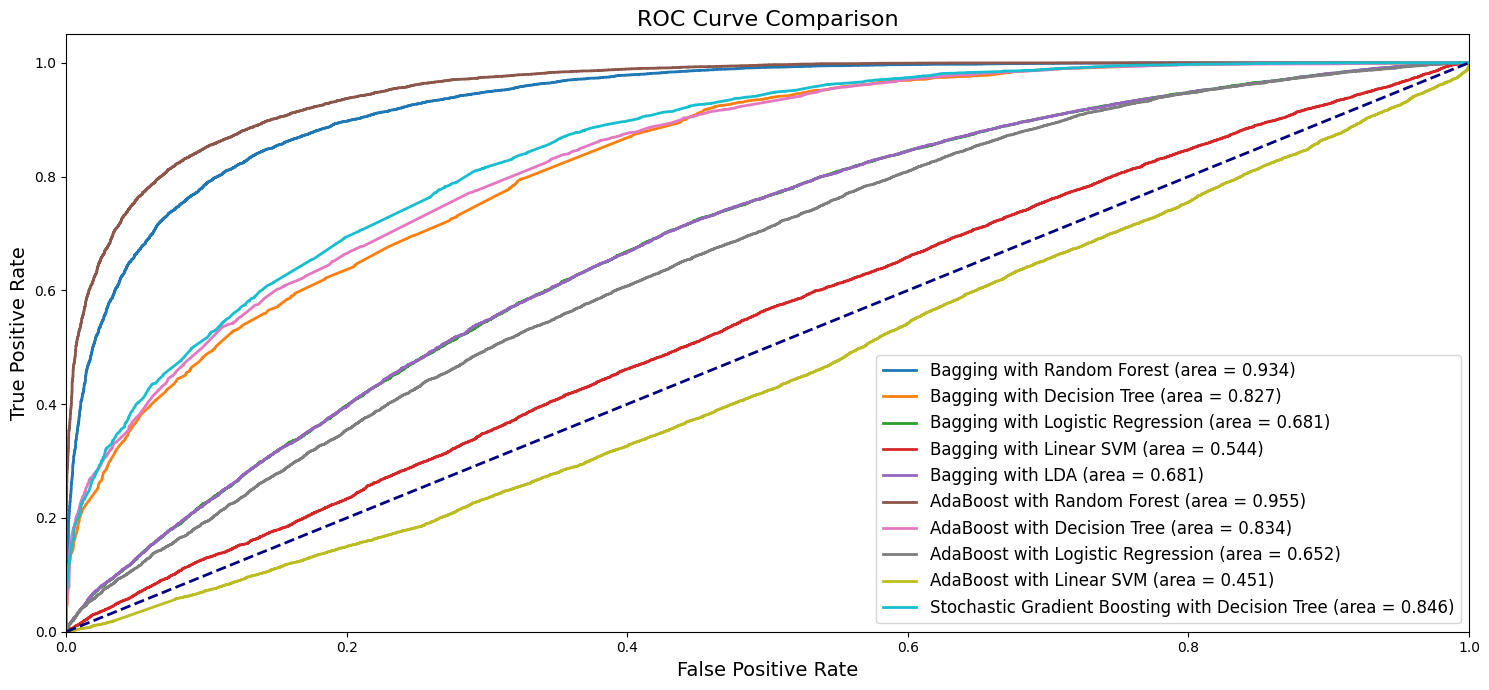


Bagging with Random Forest - Classification Report:

              precision  recall  f1-score   support
0                 0.914   0.750     0.824 13359.000
1                 0.784   0.927     0.850 13050.000
accuracy          0.838   0.838     0.838     0.838
macro avg         0.849   0.839     0.837 26409.000
weighted avg      0.849   0.838     0.837 26409.000

Bagging with Decision Tree - Classification Report:

              precision  recall  f1-score   support
0                 0.827   0.596     0.693 13359.000
1                 0.679   0.872     0.763 13050.000
accuracy          0.733   0.733     0.733     0.733
macro avg         0.753   0.734     0.728 26409.000
weighted avg      0.754   0.733     0.728 26409.000

Bagging with Logistic Regression - Classification Report:

              precision  recall  f1-score   support
0                 0.651   0.596     0.622 13359.000
1                 0.619   0.672     0.645 13050.000
accuracy          0.634   0.634     0.634     0.634


In [5]:
# ensemble machine learning models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the directory 
plot_dir = 'Plots_P2_EnsemMLs/'
os.makedirs(plot_dir, exist_ok=True)

# Load the dataset
file_path = 'concatenated_HC_MDD_1000_BoAW_MFCC_with_labels.csv'
data = pd.read_csv(file_path)

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the base classifiers
base_classifiers = {
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM': SVC(kernel='linear', max_iter=500, probability=True, random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# Define the ensemble classifiers
classifiers = {
    'Bagging with Random Forest': BaggingClassifier(estimator=base_classifiers['Random Forest'], n_estimators=2, random_state=42),
    'Bagging with Decision Tree': BaggingClassifier(estimator=base_classifiers['Decision Tree'], n_estimators=2, random_state=42),
    'Bagging with Logistic Regression': BaggingClassifier(estimator=base_classifiers['Logistic Regression'], n_estimators=2, random_state=42),
    'Bagging with Linear SVM': BaggingClassifier(estimator=base_classifiers['Linear SVM'], n_estimators=2, random_state=42),
    'Bagging with LDA': BaggingClassifier(estimator=base_classifiers['LDA'], n_estimators=2, random_state=42),
    'AdaBoost with Random Forest': AdaBoostClassifier(estimator=base_classifiers['Random Forest'], n_estimators=2, random_state=42),
    'AdaBoost with Decision Tree': AdaBoostClassifier(estimator=base_classifiers['Decision Tree'], n_estimators=2, random_state=42),
    'AdaBoost with Logistic Regression': AdaBoostClassifier(estimator=base_classifiers['Logistic Regression'], n_estimators=2, random_state=42),
     'AdaBoost with Linear SVM': AdaBoostClassifier(estimator=base_classifiers['Linear SVM'], n_estimators=2, random_state=42),
    'Stochastic Gradient Boosting with Random Forest': GradientBoostingClassifier(max_depth=10, n_estimators=2, random_state=42),

}

results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time

    print(f"Evaluating {name}...")
    y_pred = clf.predict(X_test)
    
    if hasattr(clf, "decision_function"):
        y_decision = clf.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_decision)
        roc_auc = roc_auc_score(y_test, y_decision)
    else:
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Save the model to a temporary file to measure its size
    temp_model_file = f"{name}_model.joblib"
    joblib.dump(clf, temp_model_file)
    model_size = os.path.getsize(temp_model_file) / (1024 ** 2)  # Convert size to megabytes
    os.remove(temp_model_file)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True, digits=3)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Classifier': name,
        'Training Time (s)': training_time,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score'],
        'ROC AUC': roc_auc,
        'Model Size (MB)': model_size,
        'Confusion Matrix': cm,
        'ROC Curve': (fpr, tpr, roc_auc),
        'Classification Report': report
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Training Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Model Size (MB)'])
print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    plt.yticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    
    # Display the numbers in the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black', fontsize=14)
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plotting confusion matrices for all classifiers
for result in results:
    name = result['Classifier']
    cm = result['Confusion Matrix']
    plot_confusion_matrix(cm, f'{name} - Confusion Matrix', os.path.join(plot_dir, f'{name}_confusion_matrix.png'))

# Function to plot ROC curve
def plot_roc_curve(results, filename):
    plt.figure(figsize=(15, 7))
    for result in results:
        name = result['Classifier']
        fpr, tpr, roc_auc = result['ROC Curve']
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:0.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve Comparison', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plotting ROC curves for all classifiers
plot_roc_curve(results, os.path.join(plot_dir, 'roc_curve_comparison.png'))

# Displaying classification reports
for result in results:
    name = result['Classifier']
    report = result['Classification Report']
    print(f"\n{name} - Classification Report:\n")
    report_df = pd.DataFrame(report).transpose()
    print(report_df.to_string(float_format="%.3f"))


In [8]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Administrator\.conda\envs\p311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: hmmlearn, imbalanced-learn, librosa, pynndescent, scikit-optimize, umap-learn
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip show keras

Name: keras
Version: 3.0.5
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages
Requires: absl-py, dm-tree, h5py, ml-dtypes, namex, numpy, rich
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


Training Fully Connected Neural Network...
Epoch 1/10


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2311/2311 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - accuracy: 0.5111 - loss: 0.7431 - val_accuracy: 0.6069 - val_loss: 0.6634
Epoch 2/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.5899 - loss: 0.6626 - val_accuracy: 0.6621 - val_loss: 0.6229
Epoch 3/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.6454 - loss: 0.6268 - val_accuracy: 0.7106 - val_loss: 0.5753
Epoch 4/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.6829 - loss: 0.5930 - val_accuracy: 0.7489 - val_loss: 0.5230
Epoch 5/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.7099 - loss: 0.5547 - val_accuracy: 0.7813 - val_loss: 0.4827
Epoch 6/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.7314 - loss: 0.5339 - val_accuracy: 0.7979 - val_loss: 0.4587
Epoch 7/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.7477 - loss: 0.5126 - val_accuracy: 0.8003 - val_loss: 0.4416
Epoch 8/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.7553 - loss: 0.49


Fully Connected Neural Network - Classification Report:

              precision  recall  f1-score   support
0                 0.909   0.770     0.834 13359.000
1                 0.797   0.921     0.854 13050.000
accuracy          0.845   0.845     0.845     0.845
macro avg         0.853   0.846     0.844 26409.000
weighted avg      0.854   0.845     0.844 26409.000
Training 1DCNN...
Epoch 1/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6246 - loss: 0.6386 - val_accuracy: 0.6919 - val_loss: 0.5751
Epoch 2/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6933 - loss: 0.5736 - val_accuracy: 0.7206 - val_loss: 0.5362
Epoch 3/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7178 - loss: 0.5427 - val_accuracy: 0.7413 - val_loss: 0.5129
Epoch 4/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7288 - loss: 0.5266 - val_accuracy: 0.7621 - val_loss: 0.4892
Epoch 5/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7404 - loss: 0.5120 - va


1DCNN - Classification Report:

              precision  recall  f1-score   support
0                 0.814   0.772     0.792 13359.000
1                 0.778   0.819     0.798 13050.000
accuracy          0.795   0.795     0.795     0.795
macro avg         0.796   0.796     0.795 26409.000
weighted avg      0.796   0.795     0.795 26409.000
Training LSTM...
Epoch 1/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 65s 28ms/step - accuracy: 0.5416 - loss: 0.6878 - val_accuracy: 0.5703 - val_loss: 0.6811
Epoch 2/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 62s 27ms/step - accuracy: 0.5761 - loss: 0.6747 - val_accuracy: 0.5850 - val_loss: 0.6639
Epoch 3/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 66s 29ms/step - accuracy: 0.6003 - loss: 0.6563 - val_accuracy: 0.6296 - val_loss: 0.6354
Epoch 4/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 65s 28ms/step - accuracy: 0.6348 - loss: 0.6271 - val_accuracy: 0.6560 - val_loss: 0.6016
Epoch 5/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 63s 27ms/step - accuracy: 0.6635 - loss: 0.5971 - val_accuracy: 0.69


LSTM - Classification Report:

              precision  recall  f1-score   support
0                 0.834   0.747     0.788 13359.000
1                 0.766   0.848     0.805 13050.000
accuracy          0.797   0.797     0.797     0.797
macro avg         0.800   0.797     0.796 26409.000
weighted avg      0.800   0.797     0.796 26409.000
Training Hybrid 1DCNN + LSTM...
Epoch 1/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.5995 - loss: 0.6530 - val_accuracy: 0.7235 - val_loss: 0.5291
Epoch 2/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7263 - loss: 0.5354 - val_accuracy: 0.8085 - val_loss: 0.4281
Epoch 3/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7736 - loss: 0.4665 - val_accuracy: 0.8441 - val_loss: 0.3709
Epoch 4/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.7967 - loss: 0.4262 - val_accuracy: 0.8647 - val_loss: 0.3369
Epoch 5/10
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.8151 - loss: 0.3968 - val_


Hybrid 1DCNN + LSTM - Classification Report:

              precision  recall  f1-score   support
0                 0.916   0.904     0.910 13359.000
1                 0.903   0.915     0.909 13050.000
accuracy          0.909   0.909     0.909     0.909
macro avg         0.909   0.909     0.909 26409.000
weighted avg      0.910   0.909     0.909 26409.000
                       Classifier  Training Time (s)  Accuracy  Precision  \
0  Fully Connected Neural Network          24.033912  0.844863   0.853612   
1                           1DCNN          66.089340  0.795297   0.796205   
2                            LSTM         646.271897  0.796812   0.800372   
3             Hybrid 1DCNN + LSTM         848.733730  0.909425   0.909506   

     Recall  F1-score   ROC AUC  Model Size (MB)  
0  0.844863  0.844069  0.845749         0.133369  
1  0.795297  0.795223  0.795570         0.136368  
2  0.796812  0.796375  0.797399         0.609467  
3  0.909425  0.909428  0.909488         1.291580  


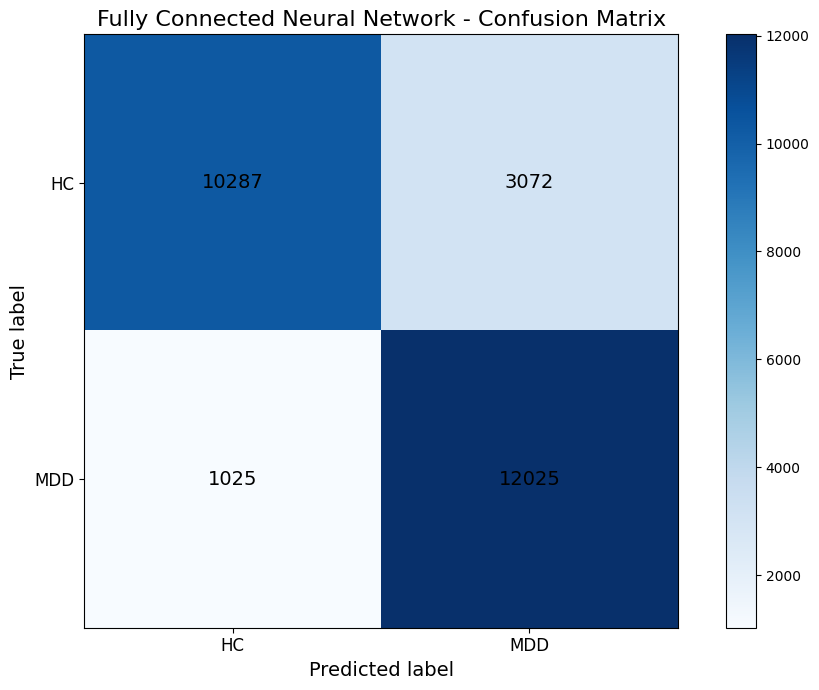

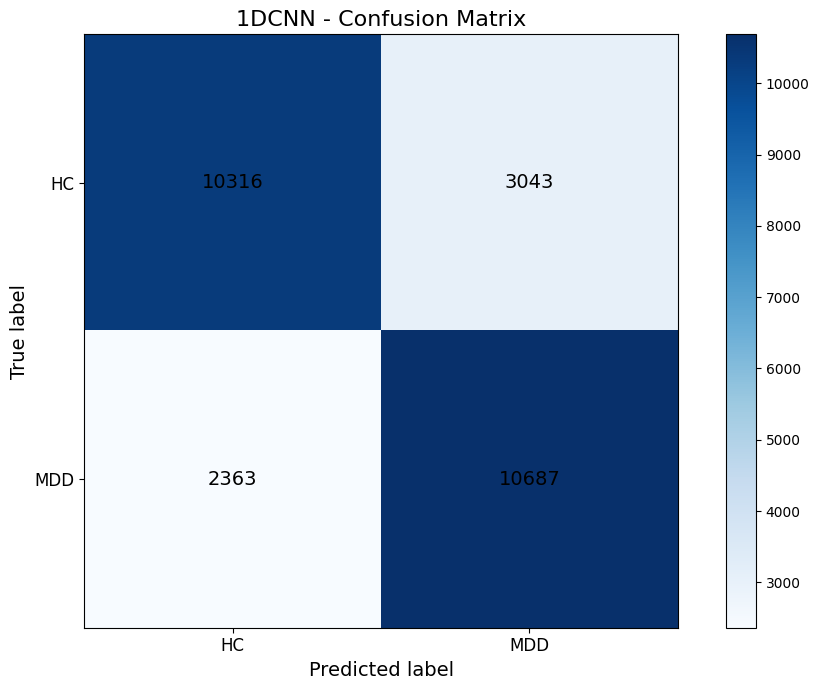

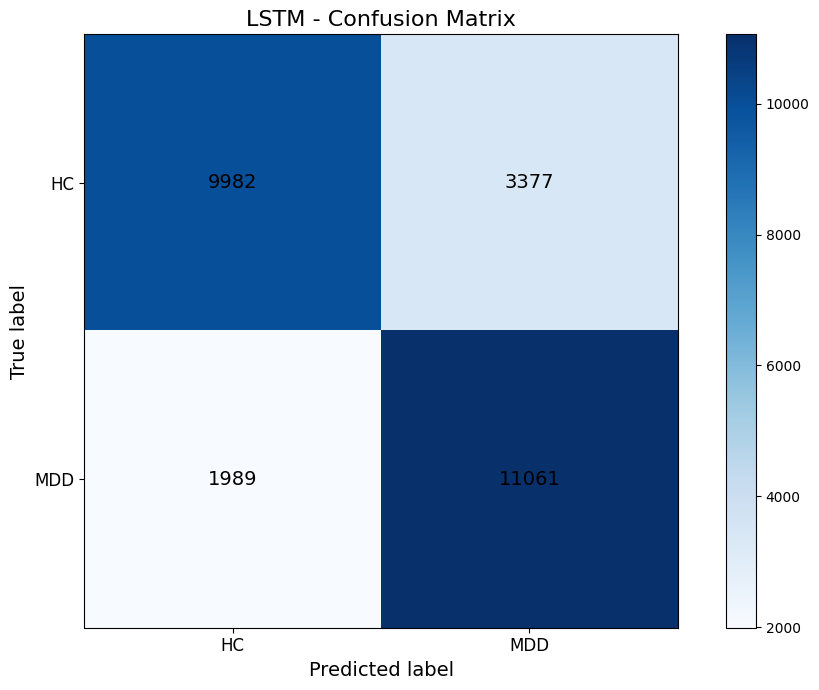

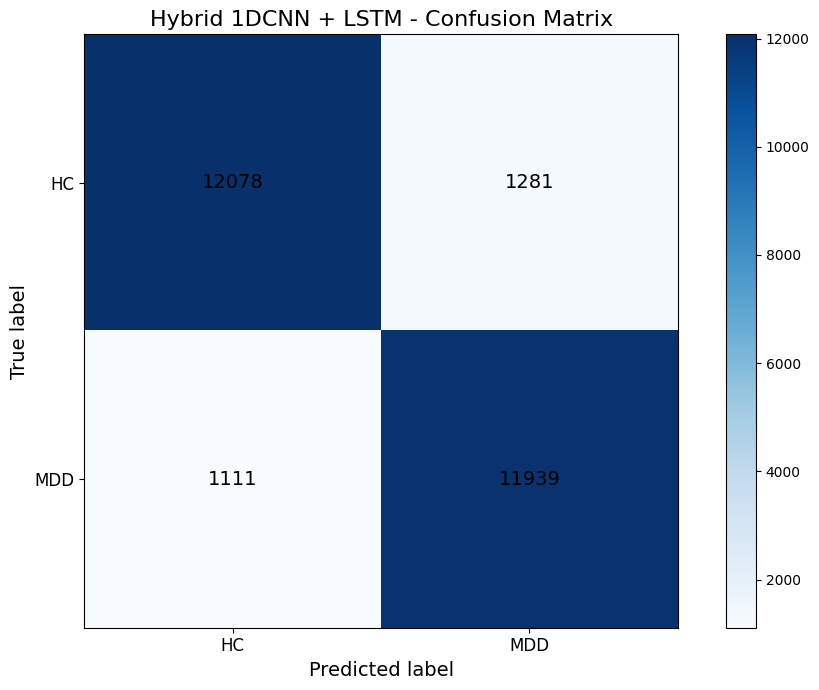

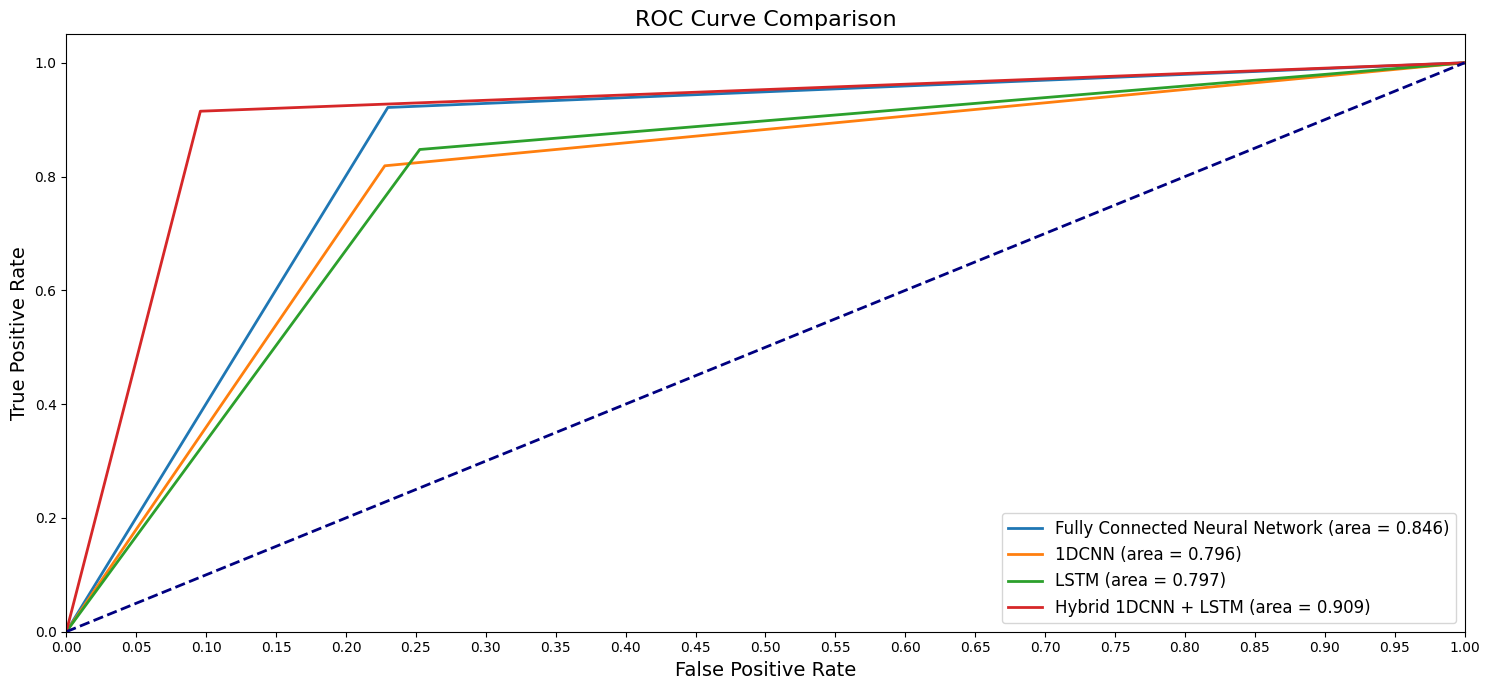


Fully Connected Neural Network - Classification Report:

              precision  recall  f1-score   support
0                 0.909   0.770     0.834 13359.000
1                 0.797   0.921     0.854 13050.000
accuracy          0.845   0.845     0.845     0.845
macro avg         0.853   0.846     0.844 26409.000
weighted avg      0.854   0.845     0.844 26409.000

1DCNN - Classification Report:

              precision  recall  f1-score   support
0                 0.814   0.772     0.792 13359.000
1                 0.778   0.819     0.798 13050.000
accuracy          0.795   0.795     0.795     0.795
macro avg         0.796   0.796     0.795 26409.000
weighted avg      0.796   0.795     0.795 26409.000

LSTM - Classification Report:

              precision  recall  f1-score   support
0                 0.834   0.747     0.788 13359.000
1                 0.766   0.848     0.805 13050.000
accuracy          0.797   0.797     0.797     0.797
macro avg         0.800   0.797     0.796 264

In [6]:
#deep learning models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, LSTM, concatenate, Dropout

# Create the directory 
plot_dir = 'Plots_NNs/'
os.makedirs(plot_dir, exist_ok=True)

# Load the dataset
file_path = 'concatenated_HC_MDD_1000_BoAW_MFCC_with_labels.csv'
data = pd.read_csv(file_path)

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data to fit the 1DCNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Network parameters
input_shape = (X_train.shape[1], 1)  # Adapt input shape
lstm_units = 100
fnn_units = 100
num_classes = 1  # Binary classification

# Build Fully Connected Neural Network (FNN) model
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build 1DCNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    Dropout(0.2),
    Flatten(),
    Dense(num_classes, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Build LSTM model
lstm_model = Sequential([
    LSTM(lstm_units, input_shape=input_shape),
    Dense(fnn_units, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Build 1DCNN + LSTM hybrid model
input_tensor = Input(shape=input_shape)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_tensor)
x = Dropout(0.5)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = Dropout(0.5)(x)
x = LSTM(lstm_units)(x)
lstm_output = Dense(fnn_units, activation='relu')(x)
lstm_output = Dropout(0.5)(lstm_output)

# Build separate FNN model
fnn_input = Input(shape=(X_train.shape[1],))
y = Dense(64, activation='relu')(fnn_input)
y = Dropout(0.2)(y)
y = Dense(32, activation='relu')(y)
y = Dropout(0.2)(y)
y = Dense(16, activation='relu')(y)
fnn_output = Flatten()(y)
fnn_output = Dropout(0.2)(fnn_output)

# Combine outputs of both models
combined = concatenate([lstm_output, fnn_output])

# Add final dense layers for classification
z = Dense(64, activation='relu')(combined)
z = Dropout(0.2)(z)
z = Dense(16, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(num_classes, activation='sigmoid')(z)  # Binary classification

# Create model
hybrid_model = Model(inputs=[input_tensor, fnn_input], outputs=output)
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate each model
models = {
    'Fully Connected Neural Network': fnn_model,
    '1DCNN': cnn_model,
    'LSTM': lstm_model,
    'Hybrid 1DCNN + LSTM': hybrid_model
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    if name == 'Hybrid 1DCNN + LSTM':
        history = model.fit([X_train_cnn, X_train], y_train, epochs=10, batch_size=32, validation_split=0.3)
        y_pred = model.predict([X_test_cnn, X_test])
    elif name == '1DCNN' or name == 'LSTM':
        history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.3)
        y_pred = model.predict(X_test_cnn)
    else:
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)
        y_pred = model.predict(X_test)

    training_time = time.time() - start_time

    y_pred = (y_pred > 0.5).astype("int32")

    # Evaluate the model with correct input shapes
    if name == 'Hybrid 1DCNN + LSTM':
        loss, accuracy = model.evaluate([X_test_cnn, X_test], y_test, verbose=0)
    elif name == '1DCNN' or name == 'LSTM':
        loss, accuracy = model.evaluate(X_test_cnn, y_test, verbose=0)
    else:
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True, digits=3)
    
    # Print classification report
    print(f"\n{name} - Classification Report:\n")
    print(pd.DataFrame(report).transpose().to_string(float_format="%.3f"))

    # Save the model to a temporary file to measure its size
    temp_model_file = f"{name}_model.h5"
    model.save(temp_model_file)
    model_size = os.path.getsize(temp_model_file) / (1024 ** 2)  # Convert size to megabytes
    os.remove(temp_model_file)

    results.append({
        'Classifier': name,
        'Training Time (s)': training_time,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score'],
        'ROC AUC': roc_auc,
        'Model Size (MB)': model_size,
        'Confusion Matrix': cm,
        'ROC Curve': (fpr, tpr, roc_auc),
        'Classification Report': report
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Training Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Model Size (MB)'])
print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    plt.yticks(tick_marks, ['HC', 'MDD'], fontsize=12)
    
    # Display the numbers in the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black', fontsize=14)
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plotting confusion matrices for all classifiers
for result in results:
    name = result['Classifier']
    cm = result['Confusion Matrix']
    plot_confusion_matrix(cm, f'{name} - Confusion Matrix', os.path.join(plot_dir, f'{name}_confusion_matrix.png'))

# Function to plot ROC curve
def plot_roc_curve(results, filename):
    plt.figure(figsize=(15, 7))
    for result in results:
        name = result['Classifier']
        fpr, tpr, roc_auc = result['ROC Curve']
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:0.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xticks(np.arange(0, 1.05, step=0.05))  # Set x-axis ticks to have a step of 0.05
    plt.title('ROC Curve Comparison', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plotting ROC curves for all classifiers
plot_roc_curve(results, os.path.join(plot_dir, 'roc_curve_comparison.png'))

# Displaying classification reports
for result in results:
    name = result['Classifier']
    report = result['Classification Report']
    print(f"\n{name} - Classification Report:\n")
    report_df = pd.DataFrame(report).transpose()
    print(report_df.to_string(float_format="%.3f"))


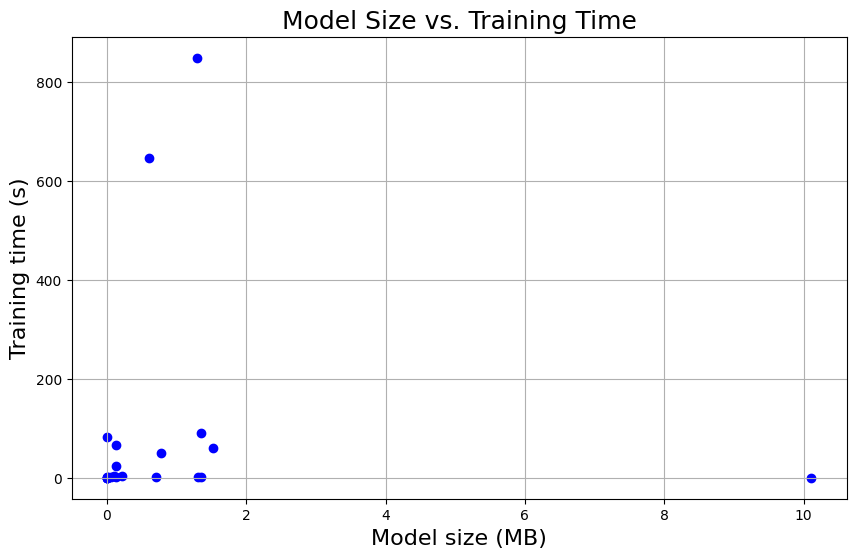

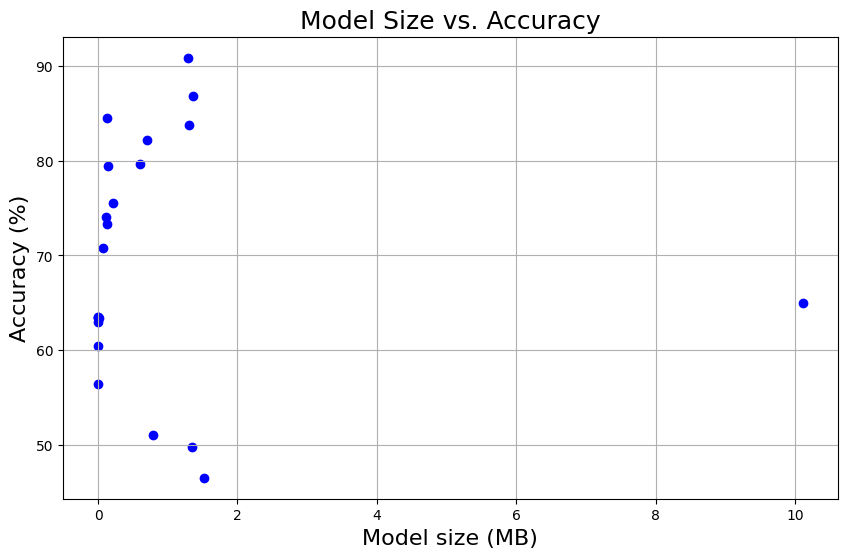

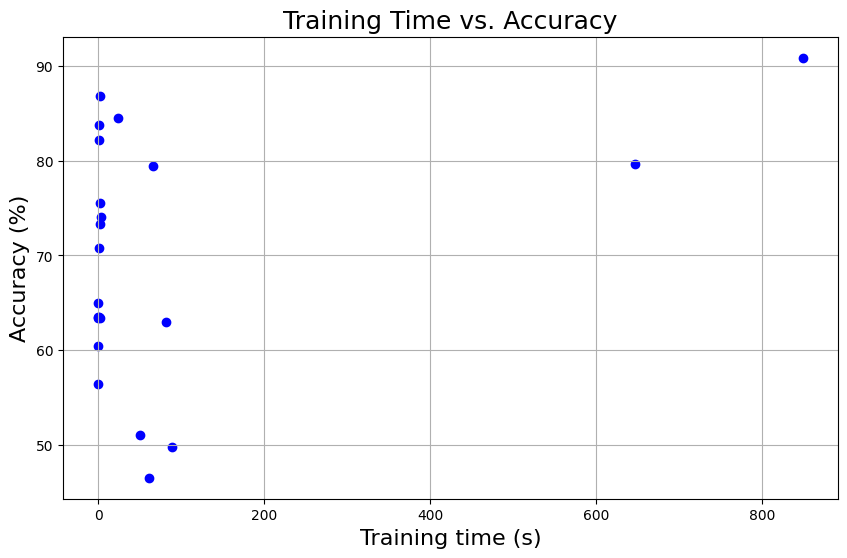

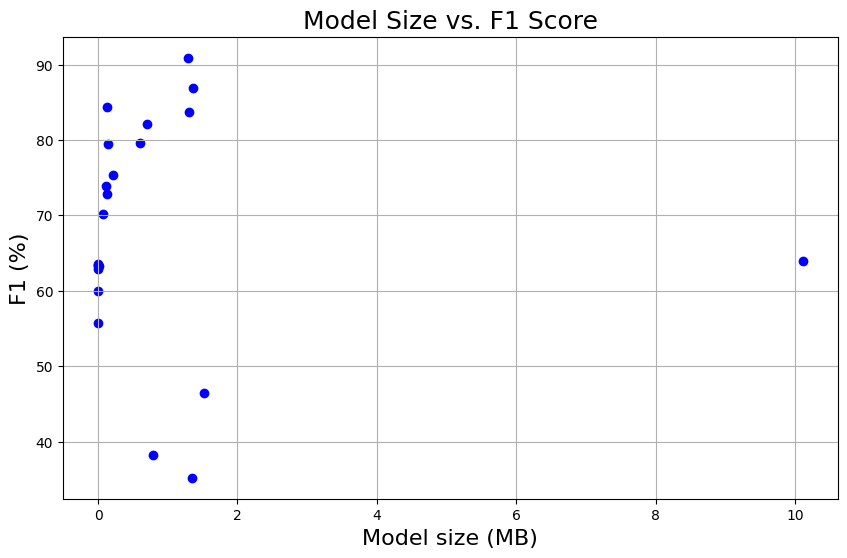

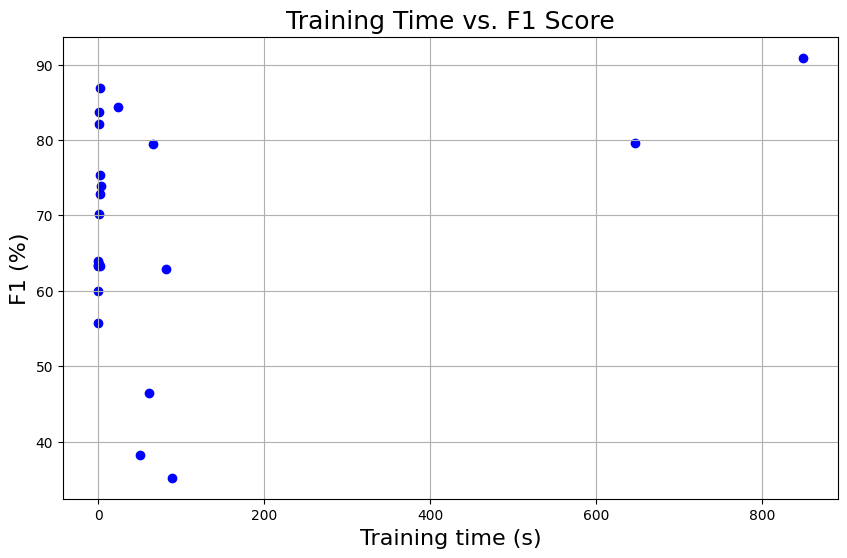

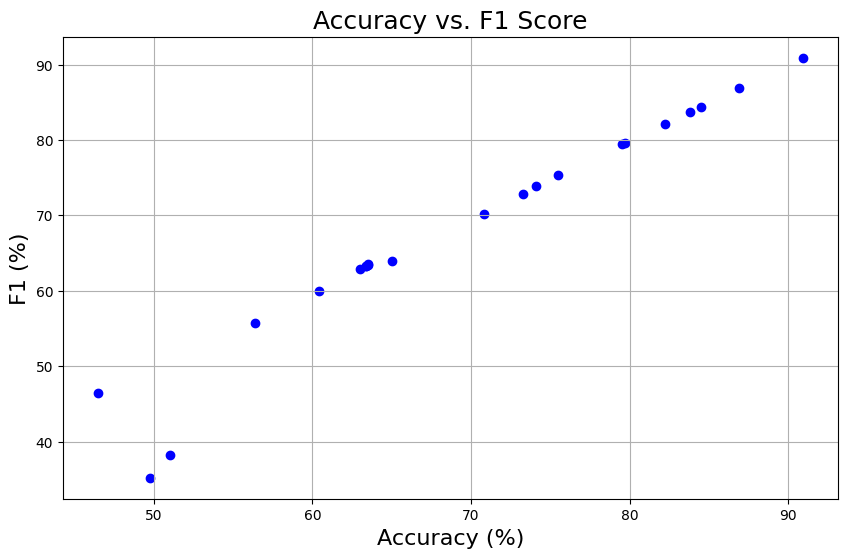

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the image
data = {
    'Model size (MB)': [
        0.066140, 0.001571, 0.006626, 0.783626, 0.701867, 0.003791, 0.004817, 10.111722,
        1.311806, 0.129372, 0.004082, 1.524193, 0.010582, 1.358845, 0.110889, 0.003203,
        1.354369, 0.216290, 0.133369, 0.136368, 0.609467, 1.291580
    ],
    'Training time (s)': [
        1.381361, 0.165327, 82.230039, 50.743221, 1.020174, 0.088478, 0.990987, 0.171756,
        1.364726, 1.820319, 0.332822, 60.885705, 2.136717, 2.243852, 3.028555, 0.244108,
        89.479924, 2.824347, 24.033912, 66.089340, 646.271897, 848.733730
    ],
    'Accuracy (%)': [
        70.8, 63.5, 63.0, 51.0, 82.2, 56.4, 63.5, 65.0, 83.8, 73.3, 63.4, 46.5,
        63.4, 86.9, 74.1, 60.4, 49.8, 75.5, 84.5, 79.5, 79.7, 90.9
    ],
    'F1 (%)': [
        70.2, 63.4, 62.9, 38.2, 82.1, 55.7, 63.5, 63.9, 83.7, 72.8, 63.3, 46.4,
        63.3, 86.9, 73.9, 59.9, 35.2, 75.3, 84.4, 79.5, 79.6, 90.9
    ]
}

df = pd.DataFrame(data)

# Scatter plot for Model size (MB) vs. Training time (s)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['Training time (s)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('Training time (s)', fontsize=16)
plt.title('Model Size vs. Training Time', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevstime.png')
plt.show()

# Scatter plot for Model size (MB) vs. Accuracy (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['Accuracy (%)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Model Size vs. Accuracy', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevsaccuracy.png')
plt.show()

# Scatter plot for Training time (s) vs. Accuracy (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Training time (s)'], df['Accuracy (%)'], color='blue')
plt.xlabel('Training time (s)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Training Time vs. Accuracy', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/timevsaccuracy.png')
plt.show()

# Scatter plot for Model size (MB) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['F1 (%)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Model Size vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevsF1.png')
plt.show()

# Scatter plot for Training time (s) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Training time (s)'], df['F1 (%)'], color='blue')
plt.xlabel('Training time (s)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Training Time vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/timevsF1.png')
plt.show()

# Scatter plot for Accuracy (%) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Accuracy (%)'], df['F1 (%)'], color='blue')
plt.xlabel('Accuracy (%)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Accuracy vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/accuracyvsF1.png')
plt.show()


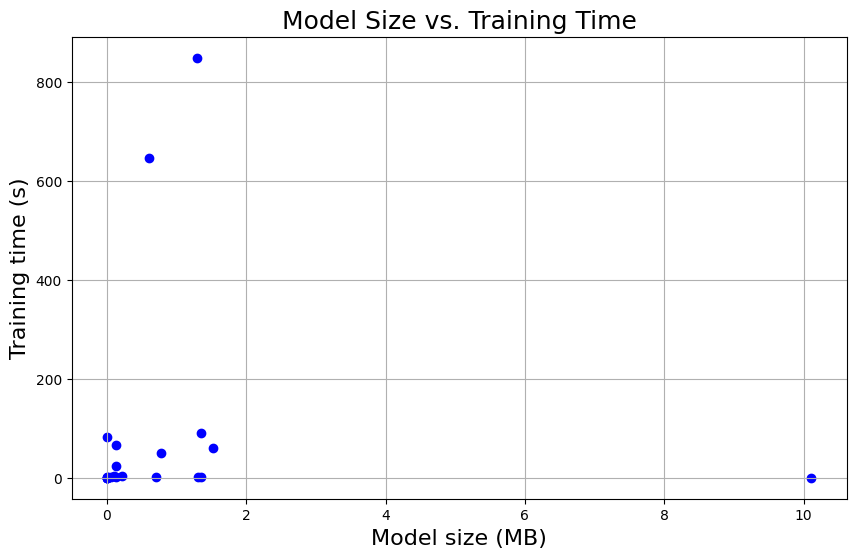

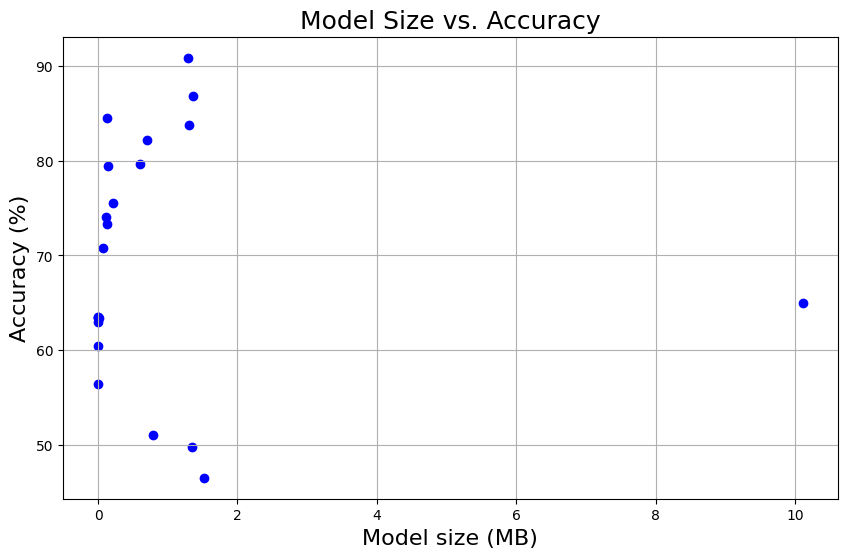

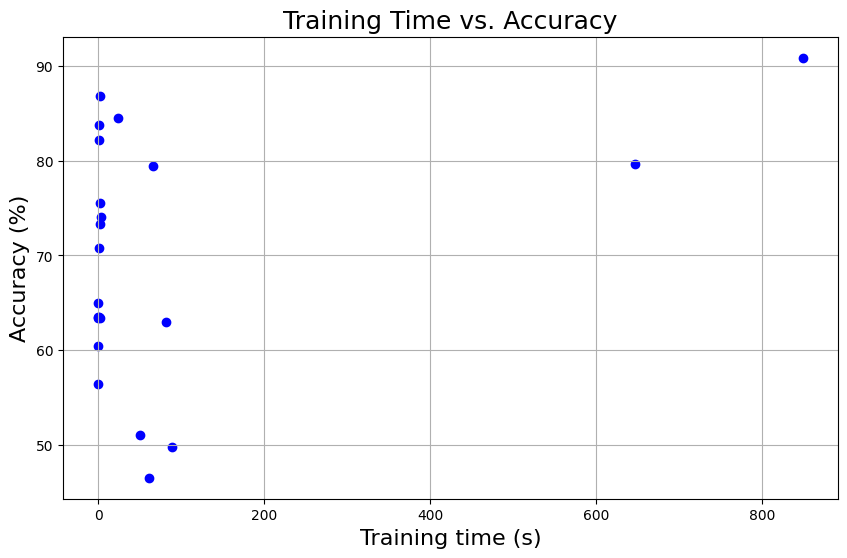

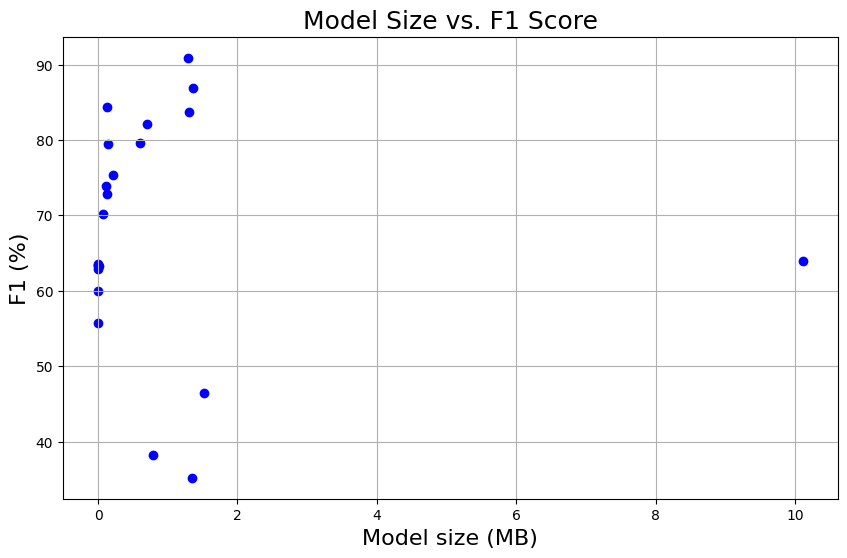

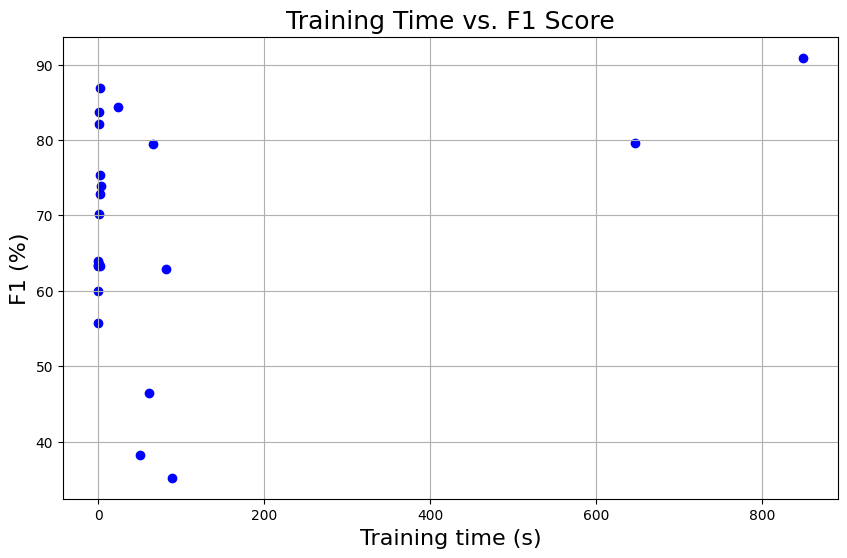

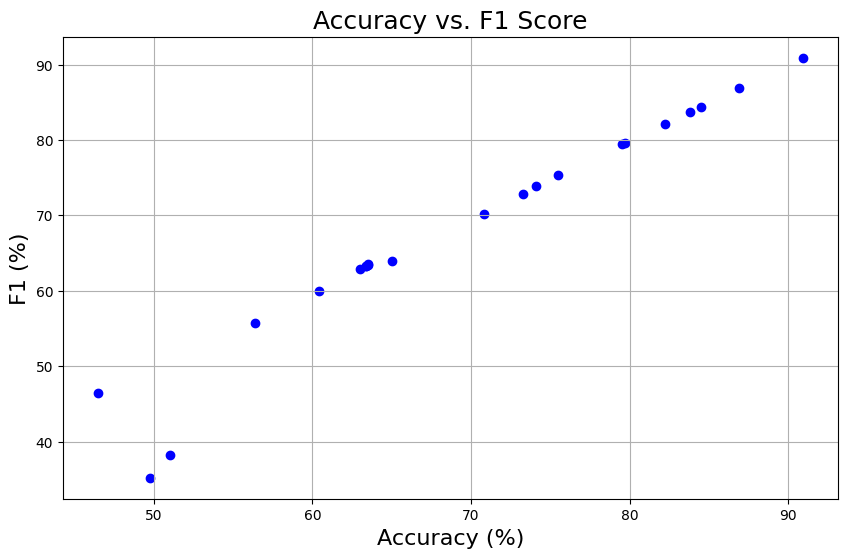

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the image
data = {
    'Model size (MB)': [
        0.066140, 0.001571, 0.006626, 0.783626, 0.701867, 0.003791, 0.004817, 10.111722,
        1.311806, 0.129372, 0.004082, 1.524193, 0.010582, 1.358845, 0.110889, 0.003203,
        1.354369, 0.216290, 0.133369, 0.136368, 0.609467, 1.291580
    ],
    'Training time (s)': [
        1.381361, 0.165327, 82.230039, 50.743221, 1.020174, 0.088478, 0.990987, 0.171756,
        1.364726, 1.820319, 0.332822, 60.885705, 2.136717, 2.243852, 3.028555, 0.244108,
        89.479924, 2.824347, 24.033912, 66.089340, 646.271897, 848.733730
    ],
    'Accuracy (%)': [
        70.8, 63.5, 63.0, 51.0, 82.2, 56.4, 63.5, 65.0, 83.8, 73.3, 63.4, 46.5,
        63.4, 86.9, 74.1, 60.4, 49.8, 75.5, 84.5, 79.5, 79.7, 90.9
    ],
    'F1 (%)': [
        70.2, 63.4, 62.9, 38.2, 82.1, 55.7, 63.5, 63.9, 83.7, 72.8, 63.3, 46.4,
        63.3, 86.9, 73.9, 59.9, 35.2, 75.3, 84.4, 79.5, 79.6, 90.9
    ]
}

df = pd.DataFrame(data)

# Scatter plot for Model size (MB) vs. Training time (s)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['Training time (s)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('Training time (s)', fontsize=16)
plt.title('Model Size vs. Training Time', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevstime.png')
plt.show()

# Scatter plot for Model size (MB) vs. Accuracy (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['Accuracy (%)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Model Size vs. Accuracy', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevsaccuracy.png')
plt.show()

# Scatter plot for Training time (s) vs. Accuracy (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Training time (s)'], df['Accuracy (%)'], color='blue')
plt.xlabel('Training time (s)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Training Time vs. Accuracy', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/timevsaccuracy.png')
plt.show()

# Scatter plot for Model size (MB) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Model size (MB)'], df['F1 (%)'], color='blue')
plt.xlabel('Model size (MB)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Model Size vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/sizevsF1.png')
plt.show()

# Scatter plot for Training time (s) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Training time (s)'], df['F1 (%)'], color='blue')
plt.xlabel('Training time (s)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Training Time vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/timevsF1.png')
plt.show()

# Scatter plot for Accuracy (%) vs. F1 (%)
plt.figure(figsize=(10, 6))
plt.scatter(df['Accuracy (%)'], df['F1 (%)'], color='blue')
plt.xlabel('Accuracy (%)', fontsize=16)
plt.ylabel('F1 (%)', fontsize=16)
plt.title('Accuracy vs. F1 Score', fontsize=18)
plt.grid(True)
plt.savefig('E:/Paper in progress/Depression recognition using BoAW MFCC/accuracyvsF1.png')
plt.show()


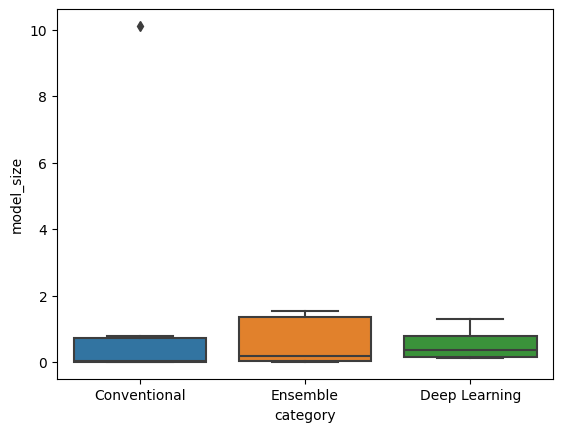

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'model': [
        'DT', 'LR', 'LSVM', 'PSVM', 'RF', 'NB', 'LDA', 'KNN',
        'Bagging RF', 'Bagging DT', 'Bagging LR', 'Bagging LSVM', 'Bagging LDA', 'AdaBoost RF', 'AdaBoost DT', 'AdaBoost LR', 'AdaBoost LSVM', 'SGB DT',
        'FNN', '1DCNN', 'LSTM', 'Hybrid 1DCNN +LSTM'
    ],
    'model_size': [
        0.06614, 0.001571, 0.006626, 0.783626, 0.701867, 0.003791, 0.004817, 10.111722,
        1.311806, 0.129372, 0.004082, 1.524193, 0.010582, 1.358845, 0.110889, 0.003203, 1.354369, 0.21629,
        0.133369, 0.136368, 0.609467, 1.29158
    ],
    'training_time': [
        1.381361, 0.165327, 82.230039, 50.743221, 1.020174, 0.088478, 0.990987, 0.171756,
        1.364726, 1.820319, 0.332822, 60.885705, 2.136717, 2.243852, 3.028555, 0.244108, 89.479924, 2.824347,
        24.033912, 66.08934, 646.271897, 848.73373
    ],
    'accuracy': [
        70.8, 63.5, 63, 51, 82.2, 56.4, 63.5, 65,
        83.8, 73.3, 63.4, 46.5, 63.4, 86.9, 74.1, 60.4, 49.8, 75.5,
        84.5, 79.5, 79.7, 90.9
    ],
    'F1': [
        70.2, 63.4, 62.9, 38.2, 82.1, 55.7, 63.5, 63.9,
        83.7, 72.8, 63.3, 46.4, 63.3, 86.9, 73.9, 59.9, 35.2, 75.3,
        84.4, 79.5, 79.6, 90.9
    ],
    'category': [
        'Conventional', 'Conventional', 'Conventional', 'Conventional', 'Conventional', 'Conventional', 'Conventional', 'Conventional',
        'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble', 'Ensemble',
        'Deep Learning', 'Deep Learning', 'Deep Learning', 'Deep Learning'
    ]
}

df = pd.DataFrame(data)

# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Add the 'category' column back to the numeric dataframe
numeric_df['category'] = df['category']

# Calculate the statistics for each category
grouped_stats = numeric_df.groupby('category').agg(['min', 'median', 'mean', 'max'])

# Display the DataFrame
grouped_stats

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (Insert the rest of the script here)

# Example visualization (if needed)
sns.boxplot(x='category', y='model_size', data=df)
plt.show()



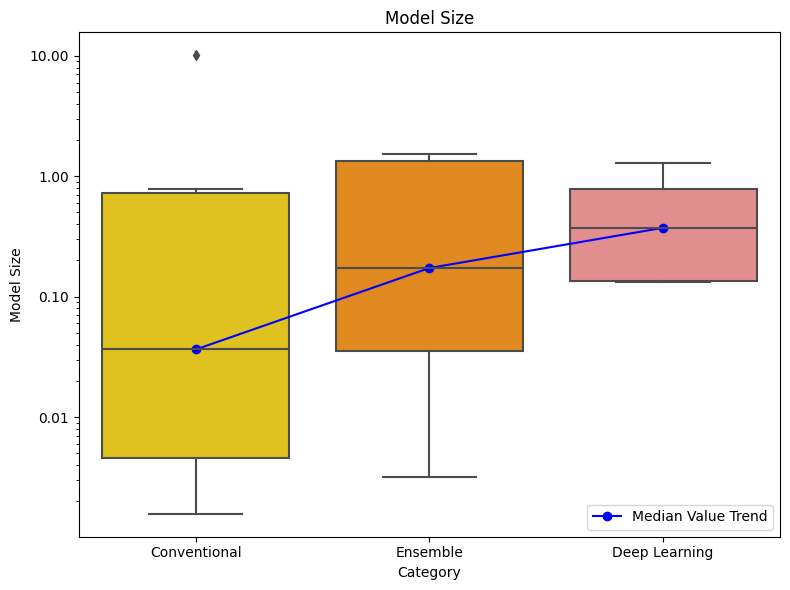

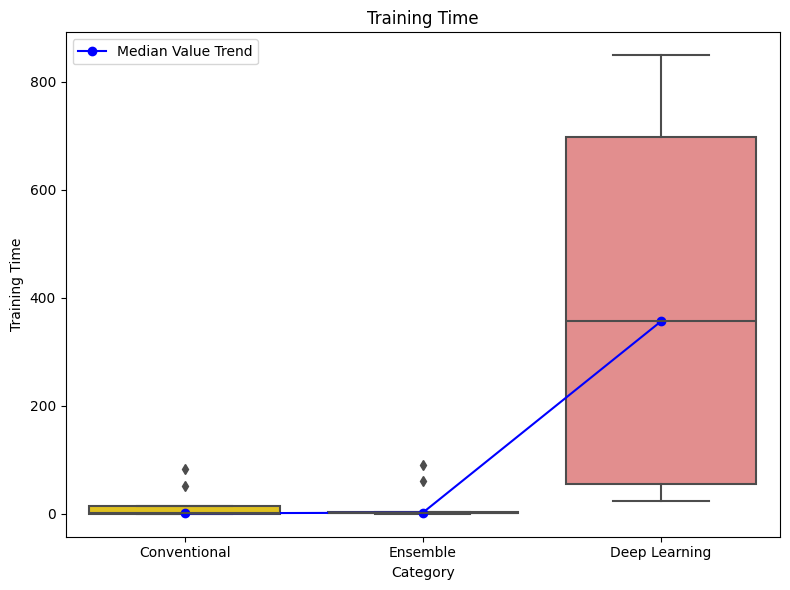

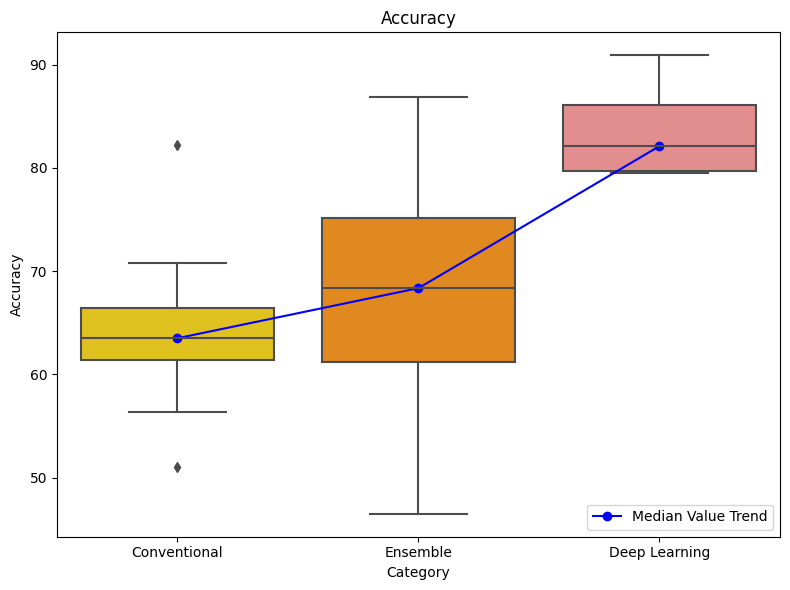

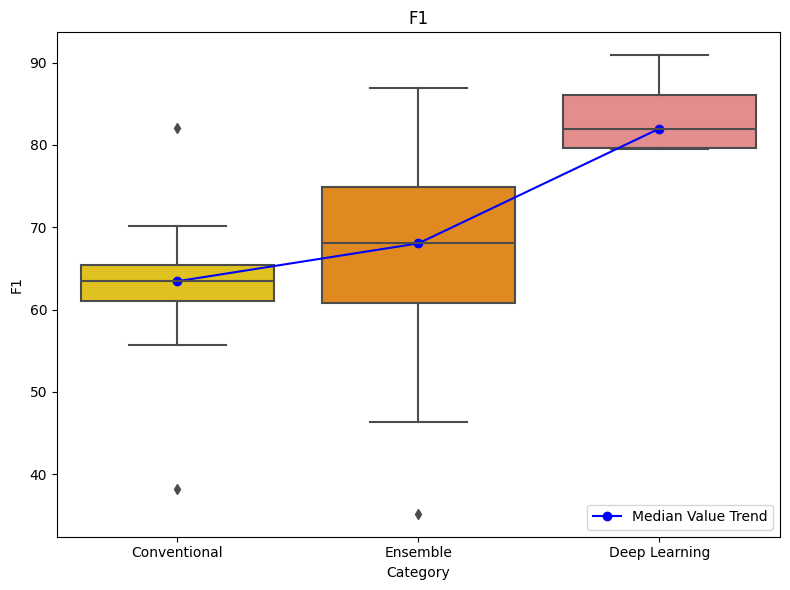

In [28]:
# Function to create and save individual plots with 'Category' as x-axis label and without model name annotations
def create_and_save_plot(y, title, ylabel, file_name, legend_loc):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x='category', y=y, data=df, order=categories_order, palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_yscale('log') if y == 'model_size' else None
    ax.set_yticks([0.01, 0.1, 1, 10]) if y == 'model_size' else None
    ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) if y == 'model_size' else None
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Category')
    annotate_max_values(ax, df, y)
    ax.plot([0, 1, 2], median_values.loc[categories_order, y], marker='o', linestyle='-', color='blue', label='Median Value Trend')
    ax.legend(loc=legend_loc)
    
    # Remove model name annotations
    for text in ax.texts:
        text.set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{file_name}', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close(fig)

# Create and save individual plots
create_and_save_plot('model_size', 'Model Size', 'Model Size', 'Model_size.png', 'lower right')
create_and_save_plot('training_time', 'Training Time', 'Training Time', 'Training_time.png', 'upper left')
create_and_save_plot('accuracy', 'Accuracy', 'Accuracy', 'Accuracy.png', 'lower right')
create_and_save_plot('F1', 'F1', 'F1', 'F1.png', 'lower right')


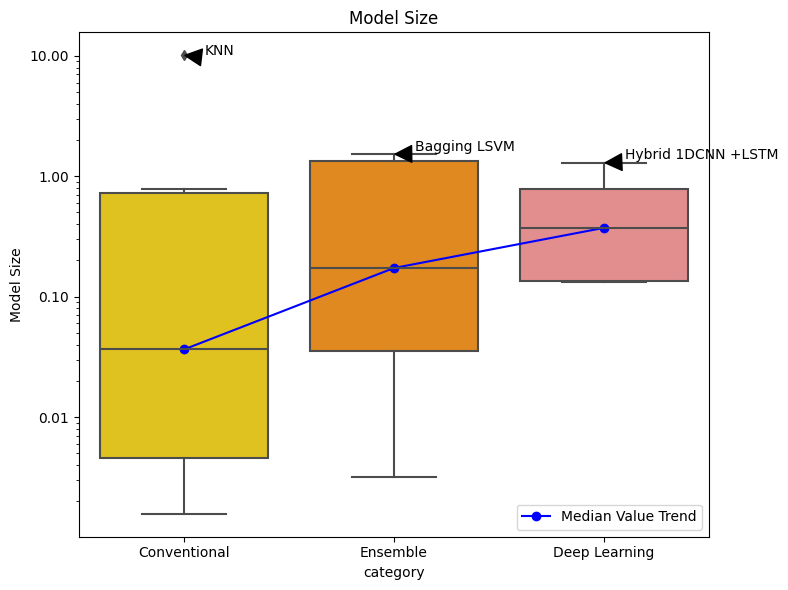

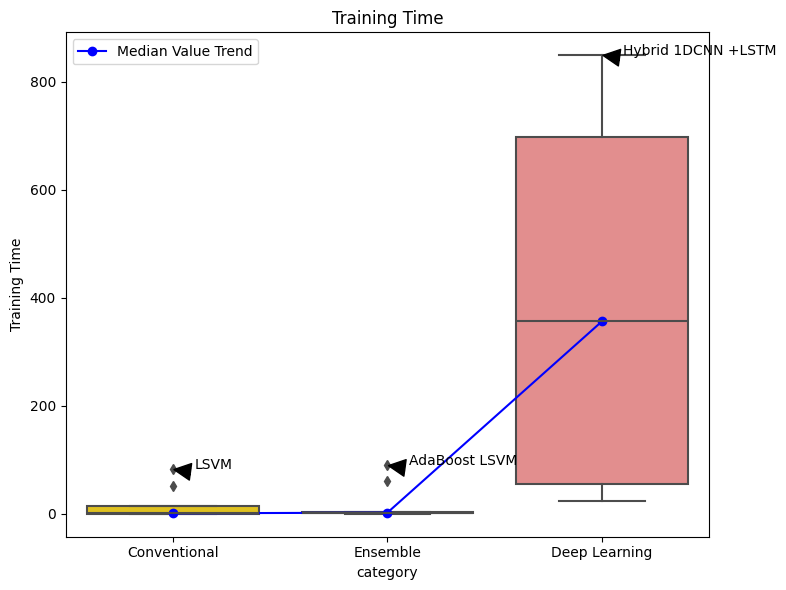

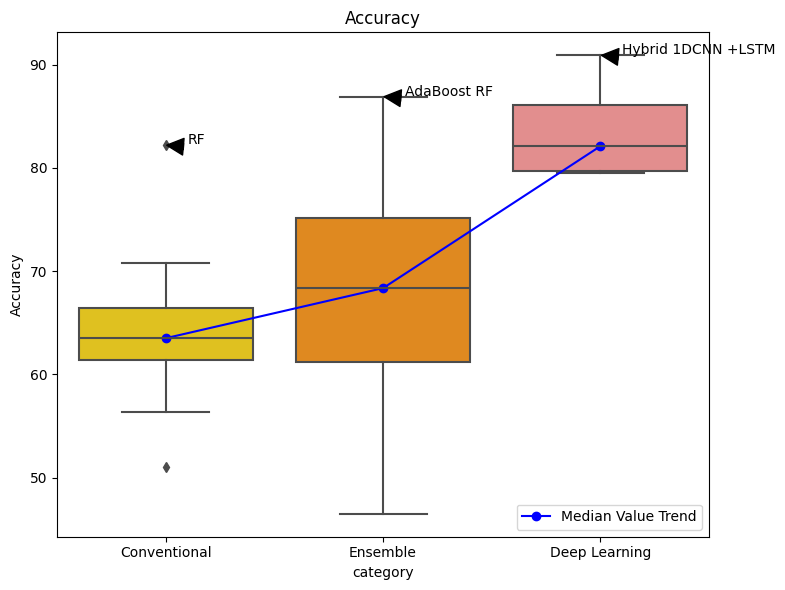

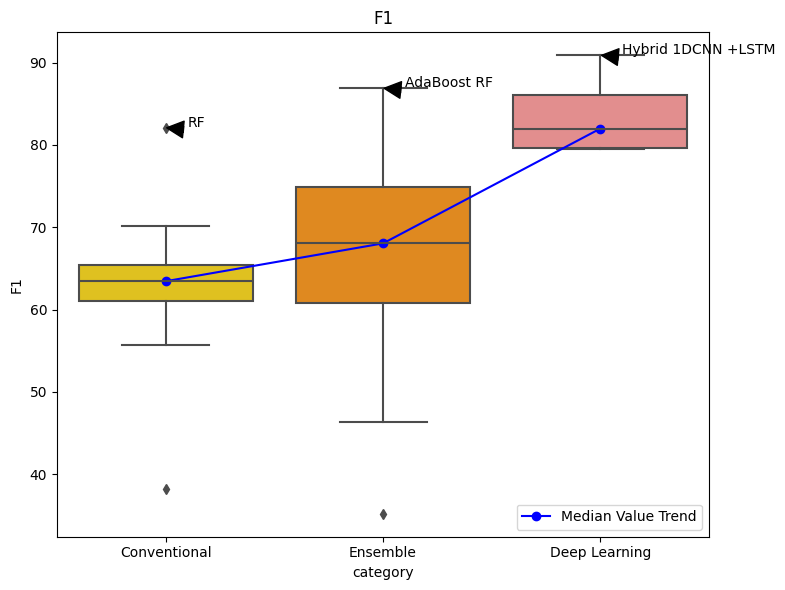